Problem 1:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 12 marks
1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)
2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 5 marks
1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

Modelling: 26 marks
1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)
2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)
3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)
4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

Inference: 5 marks
1. Based on these predictions, what are the insights? (5 marks)

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

1.1) Read the dataset. Do the descriptive statistics and do null value condition check.  5

Import the dataset and view the top 5 rows.

Import & Read the data: We will import the 'Election_Data.xlsx' and read the csv file using pandas.

In [2]:
df = pd.read_excel('Election_Data(1).xlsx', sheet_name = 'Election_Dataset_Two Classes')

Checking the Top Five Records: To eyeball the dataset, execute the df. head() function to inspect the top five records of the dataset.

In [3]:
df.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


Removal of unwanted Column: The column "Unwanted:0" is of no importance for analysis so we will remove the unwanted column'Unnamed:0' using drop() from the data set.

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


The columns of data sets are checked using df.columns

In [5]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

The dataset has 9 columns: 'vote', 'age', 'economic.cond.national', 'economic.cond.household',
'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'respectively

Data Structure The structure of dataset can be obtained using df.info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


The info() checks the structure information of the dataset and datatypes of each respective attribute.
The summary of data set shows total 26967 entries with total 9 columns with integers(7)and object(2) dtypes. 
There are no missing values in data 

Description of data (Number Summary): The summary statistics of the dataset is obtained using .describe()

In [7]:
df.describe(include='all')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [8]:
df['vote'].unique()

array(['Labour', 'Conservative'], dtype=object)

In [9]:
df['age'].unique()

array([43, 36, 35, 24, 41, 47, 57, 77, 39, 70, 66, 59, 51, 79, 37, 38, 53,
       44, 60, 56, 61, 55, 62, 76, 27, 52, 48, 72, 42, 54, 50, 46, 33, 58,
       64, 32, 71, 28, 34, 68, 67, 88, 40, 78, 65, 74, 82, 49, 84, 81, 45,
       69, 31, 63, 89, 83, 29, 92, 73, 75, 26, 90, 25, 80, 30, 86, 85, 87,
       93, 91], dtype=int64)

In [10]:
df['economic.cond.national'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [11]:
df['economic.cond.household'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [12]:
df['Blair'].unique()

array([4, 5, 2, 1, 3], dtype=int64)

In [13]:
df['Hague'].unique()

array([1, 4, 2, 5, 3], dtype=int64)

In [14]:
df['Europe'].unique()

array([ 2,  5,  3,  4,  6, 11,  1,  7,  9, 10,  8], dtype=int64)

In [15]:
df['political.knowledge'].unique()

array([2, 0, 3, 1], dtype=int64)

In [16]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


The .describe()function method in pandas is very handy in getting various summary statistics. 
The described method will help to see how data has been spread for numerical values.
We can clearly see the minimum value, mean values, different percentile values, and maximum values. 
Here we can notice mean value is close enough to median value of each column which is represented by 50% (50th percentile) 
in index column.It means the data is normally distributed and there is no skewness in data .

Skewness in data

In [18]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts)
	7

Data inspection The dimension or data inspection of data set is done by using df.shape().

In [19]:
df.shape

(1525, 9)

Dataset comprises of 1525 records and 9 attributes. Out of which vote is dependent variable and rest 8 are independent variables — physico-chemical characteristics.

Check the null values

In [20]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

It seems there are no missing values in data .Fair enough to go ahead.

Percentage of null values in data

In [21]:
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent

gender                     0.0
political.knowledge        0.0
Europe                     0.0
Hague                      0.0
Blair                      0.0
economic.cond.household    0.0
economic.cond.national     0.0
age                        0.0
vote                       0.0
dtype: float64

Check Data Types:

In [22]:
df.dtypes.value_counts()

int64     7
object    2
dtype: int64

The dataset contains  7 integers and 2 objects in total. 
The info function shows 2 columns are of type object i.e. strings.
These need to be converted to ordinal type.
The following code loops through each column and checks if the column type is object then converts those
columns into categorical with each distinct value becoming a category.


Identification of duplicates in dataset

In [23]:
df.duplicated().sum()

8

Data contains 8 duplicated value which is removed using .duplicated().

After droping the duplicate values using .drop_duplicates() we can see that the dataset show zero duplicated values.

Models in  Python can take only numerical / categorical columns. It cannot take string / object types. The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category or code.

In [24]:
df.drop_duplicates(inplace=True) 

In [25]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(1517, 9)


Drop row in pandas dataframe if any value in the row equals zero
df=df[df!=0].dropna()

df
Pick non-zero values which turns all zero values into nan and remove nan-values

In [26]:
# Identify the zero values in data 

# df.isin([0]).any().any()
# 0 in df.values

In [27]:
# df=df[df!=0].dropna()

# df

In [28]:
# df.isin([0]).any().any()

In [29]:
# Now the data contains no zero values 

Making different list for categorical columns and numerical columns

In [30]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of missing values. Using the below code snippet we are going to test whether df data frame consists of categorical variables with values as “?”.

In [31]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


The output of the above code snippet shows that there are not any  "?" or " " present in the data set

Unique values for categorical variables

In [32]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




Checking for outliers

<AxesSubplot:>

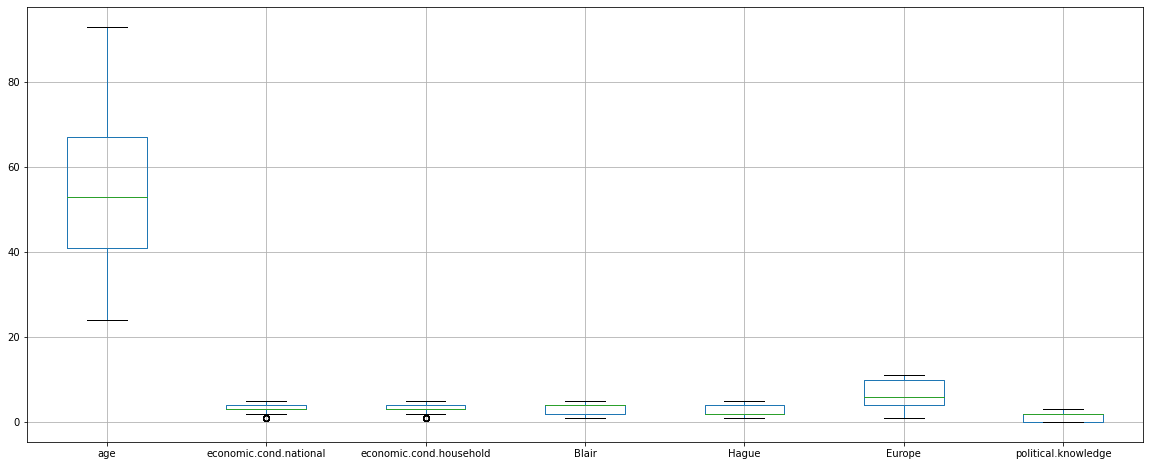

In [33]:
# continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
# data_plot=df[continuous]

# data_plot.boxplot(figsize=(15,10), rot=45);
plt.figure(figsize=(20,8))
df.boxplot()

Plot the pairplot with hue="vote for the data.

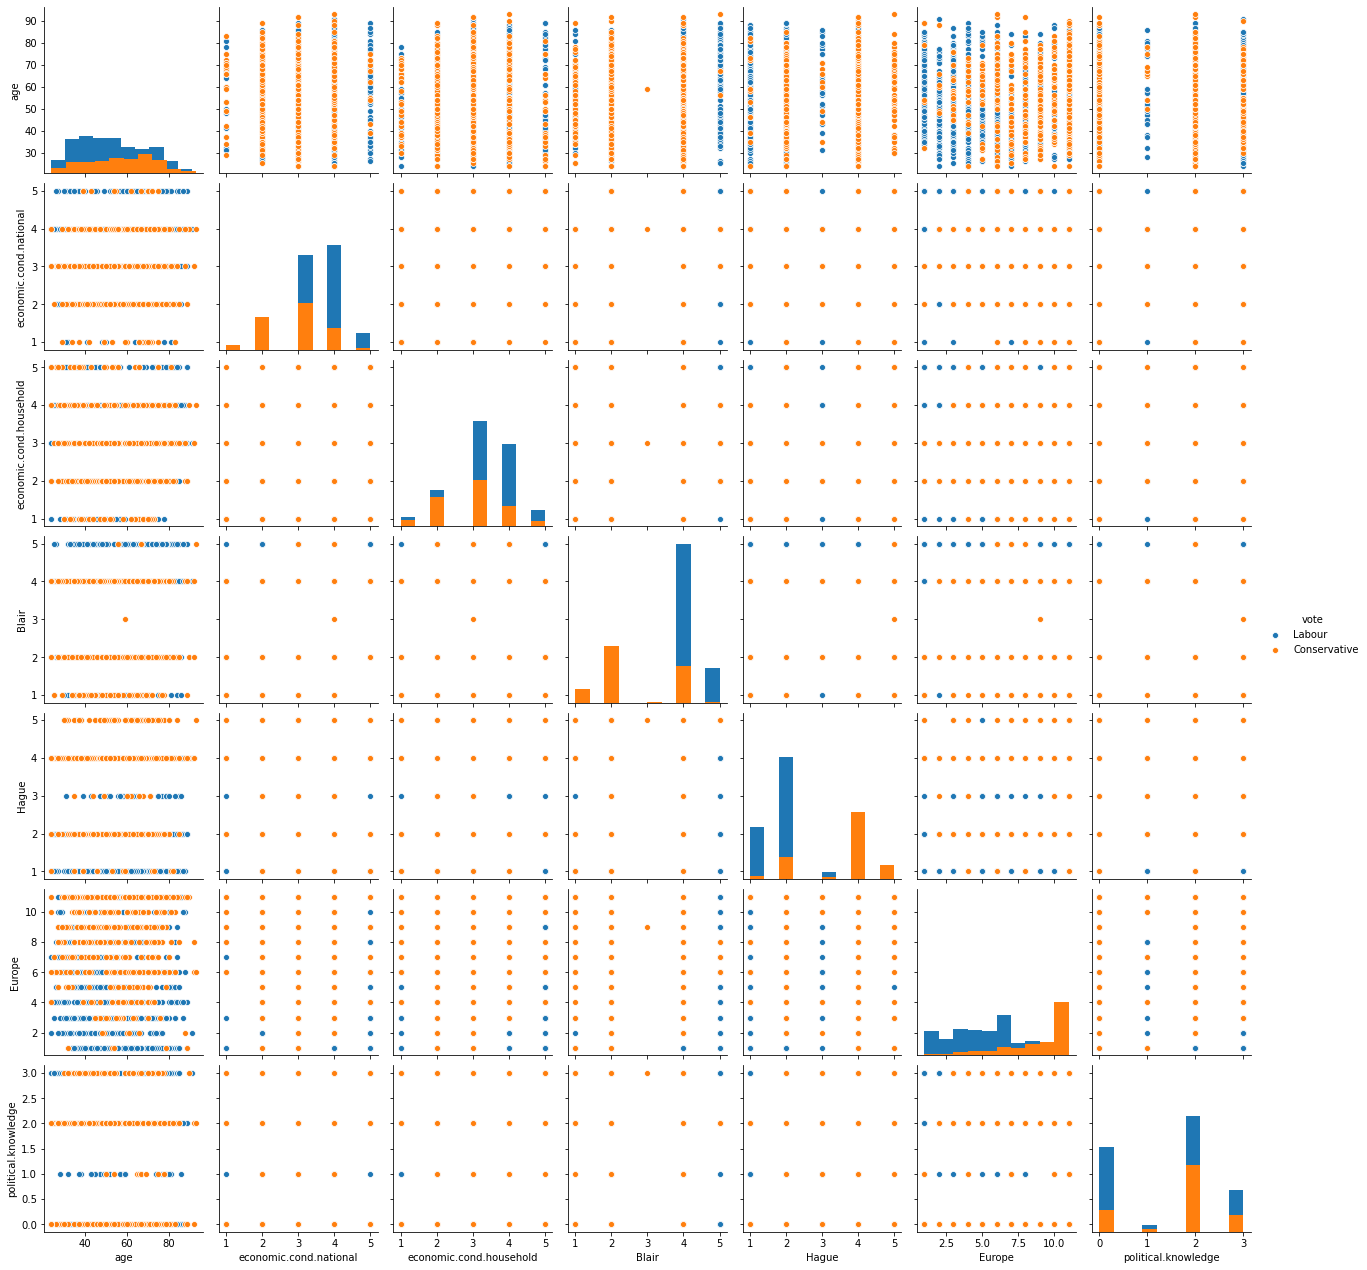

In [34]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='hist',hue='vote');

Visualization of data(Pairplot)


Correleation using corr() and heatmap using seaborn library

Observe the association of each independent variable with target variable by checking the .corr() and make a heatmap/correlation plot

In [35]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


Get the Correlation Heatmap

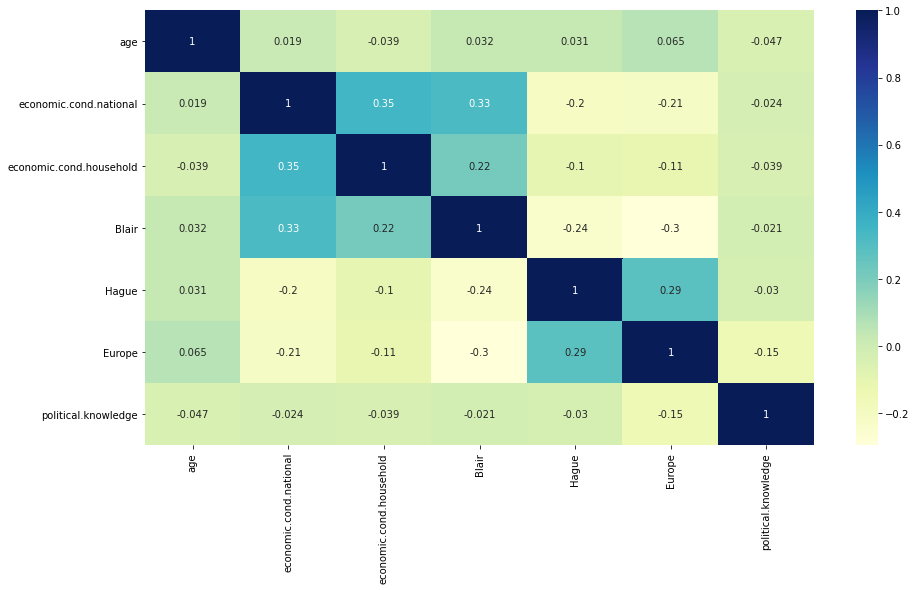

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()


1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 3 pts), Data Split: Split the data into train and test (70:30) (2 pts).
	5

Encode the data having string values for modelling 

 Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.
    The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [37]:

# Logistic Regression algorithm in python can take only numerical /categorical columns.
# It cant take string or object items .
# so we will covert the object into categoricall using label encoding .
# The following code loops through each column and checks if the column type is object then convert those columns into categorical with each distinct value becoming a category or codes

In [38]:
#Label Encoding has been done and all object columns are converted to number.
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [39]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 137.8 KB


Observe the independent variables variance and check for variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.

In [41]:
df.var()

vote                         0.211421
age                        246.544655
economic.cond.national       0.777558
economic.cond.household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
gender                       0.249099
dtype: float64

After encoding data using pd.Categorical().We can see now all data types are int type.

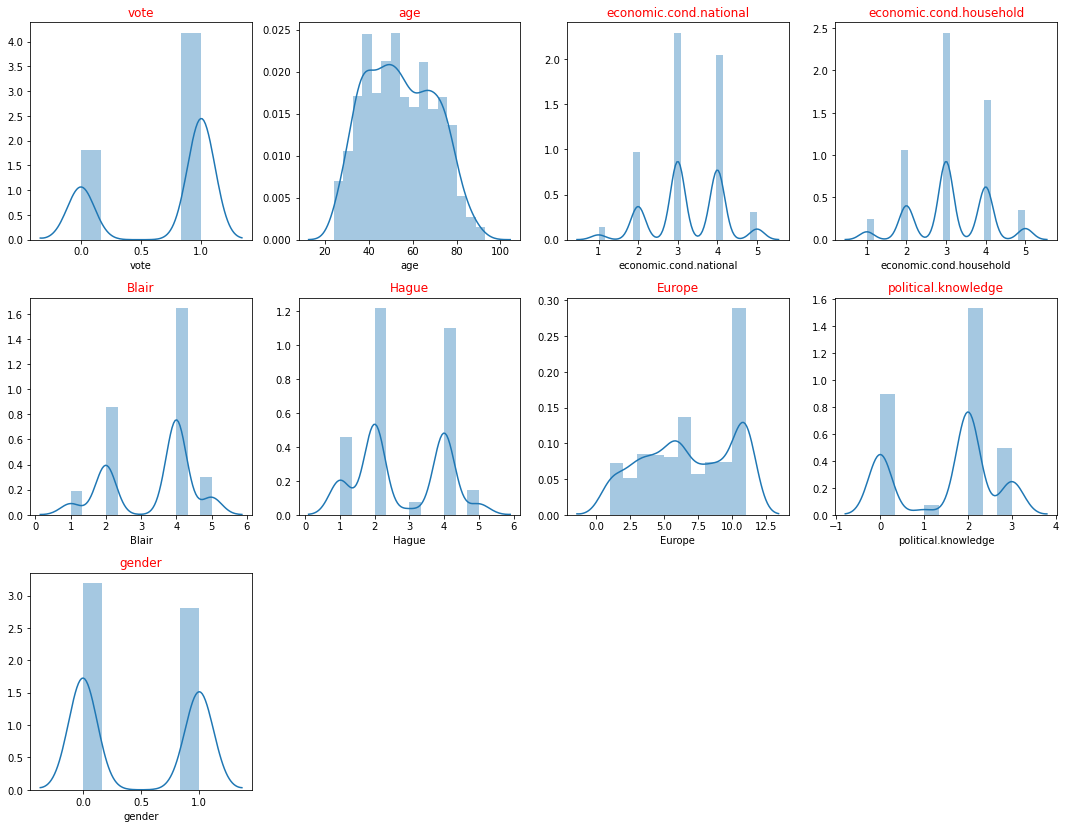

In [42]:
data_plot=df
fig=plt.figure(figsize=(15,15))
for i in range (0,len(df.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(df[df.columns[i]],hist=True)
    ax.set_title(df.columns[i],color='Red')
plt.tight_layout()
plt.show()
# hist=True we get both histogram and distplot but when hist=False we get only distplots

Univariate Analysis

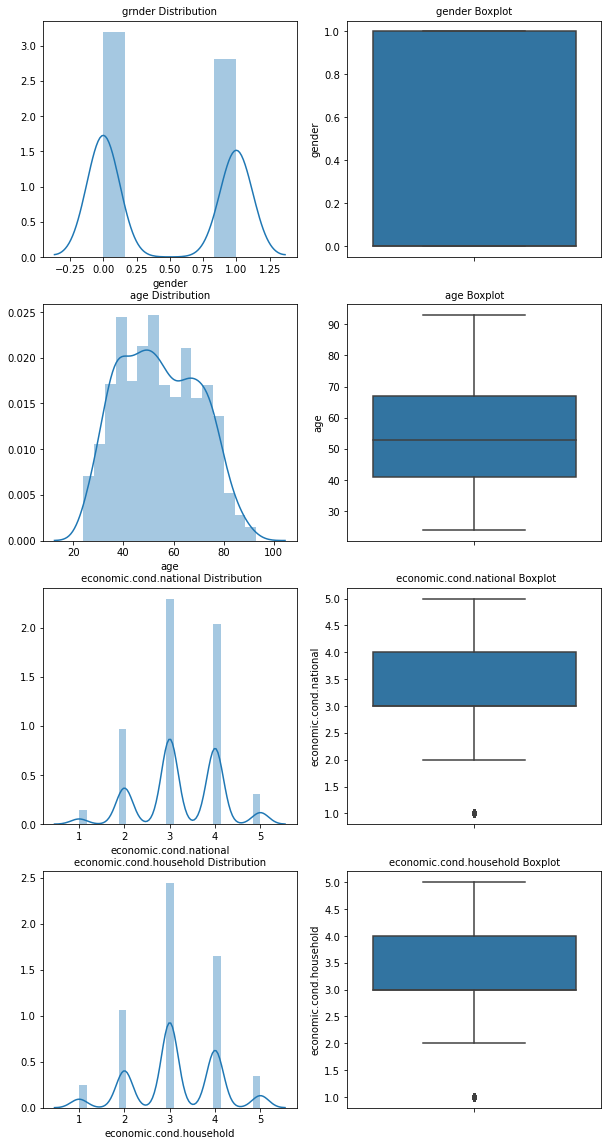

In [43]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['gender'] , ax=axes[0][0])
a.set_title("grnder Distribution",fontsize=10)

a = sns.boxplot(df['gender'] , orient = "v" , ax=axes[0][1])
a.set_title("gender Boxplot",fontsize=10)

a = sns.distplot(df['age'],ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'],orient= "v",ax=axes[1][1])
a.set_title("age Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.national'] , ax=axes[2][0])
a.set_title(" economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'],orient = "v" , ax=axes[2][1])
a.set_title(" economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'],ax=axes[3][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'],orient = "v" , ax=axes[3][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)

plt.show()

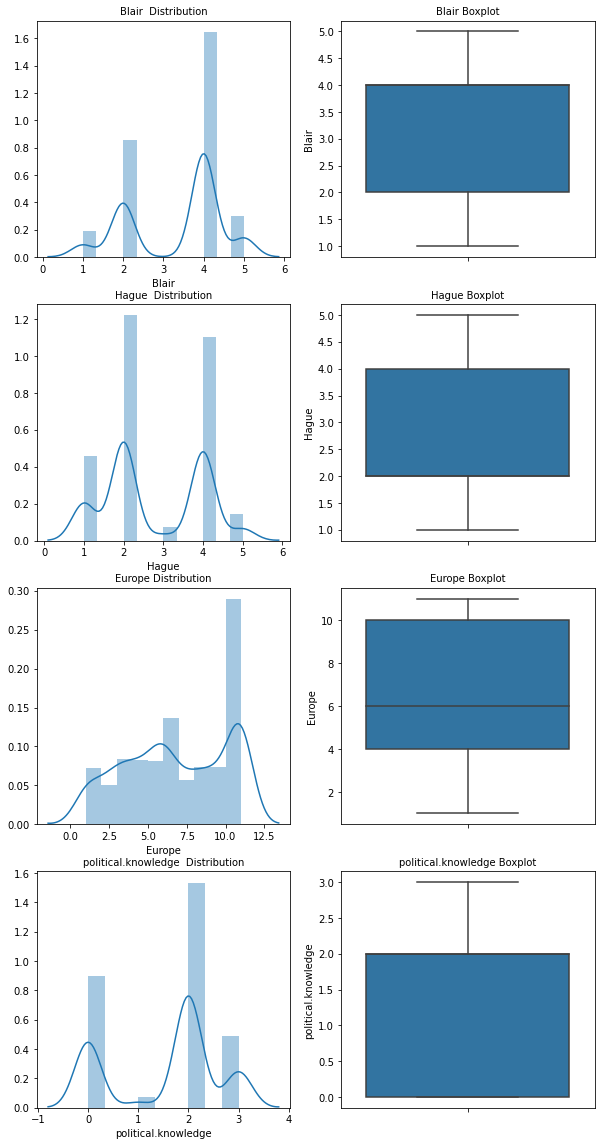

In [44]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['Blair'],ax=axes[0][0])
a.set_title("Blair  Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] ,orient = "v" , ax=axes[0][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'],ax=axes[1][0])
a.set_title("Hague  Distribution",fontsize=10)

a = sns.boxplot(df['Hague'],orient= "v",ax=axes[1][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(df['Europe'] , ax=axes[2][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'],orient = "v" , ax=axes[2][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'],ax=axes[3][0])
a.set_title("political.knowledge  Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'],orient = "v" , ax=axes[3][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()


In [45]:
# Bivariate and Multivariate Analysis

In [46]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [47]:
print(cat)

['vote', 'gender']


In [48]:
df['vote'].value_counts()

1    1057
0     460
Name: vote, dtype: int64

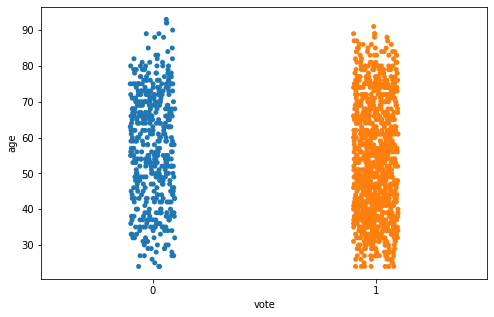

In [49]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

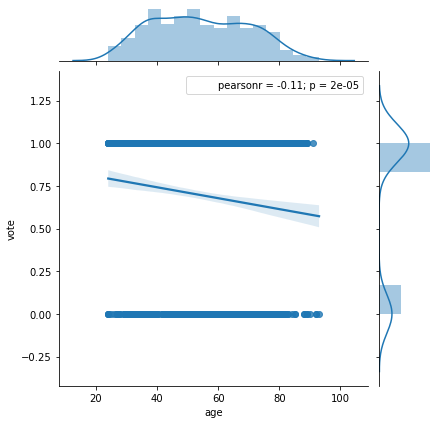

In [50]:
sns.jointplot(df['age'],df['vote'],kind='reg').annotate(stats.pearsonr)
plt.show()

In [51]:
'economic.cond.national'

'economic.cond.national'

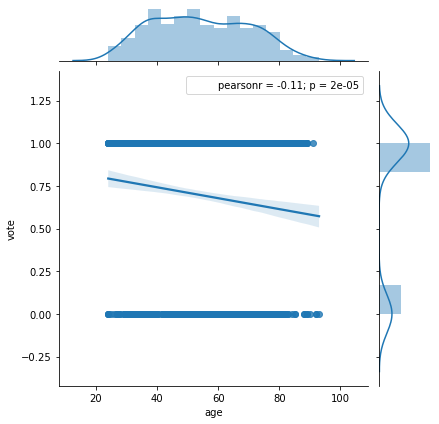

In [52]:
sns.jointplot(df['age'],df['vote'],kind='reg').annotate(stats.pearsonr)
plt.show()

Younger people have less probability of voting . This pattern is clearly visible, 
However probability of voting is low even for old age people, as per the above strip plot.

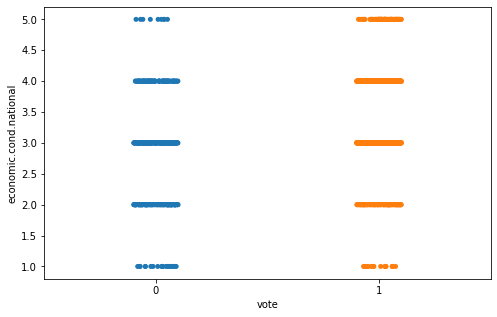

In [53]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

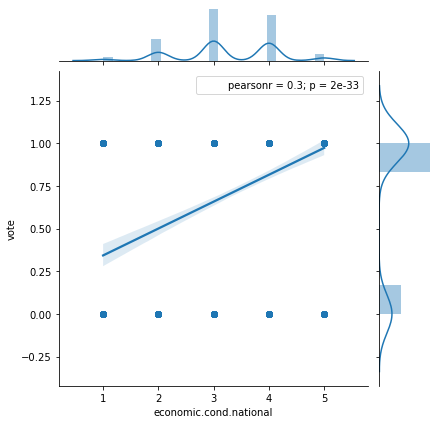

In [54]:
sns.jointplot(df['economic.cond.national'],df['vote'],kind='reg').annotate(stats.pearsonr)
plt.show()

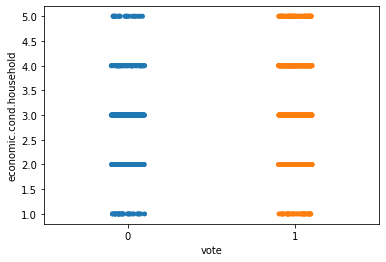

In [55]:

sns.stripplot(df['vote'], df['economic.cond.household'], jitter=True) 
plt.show()
                          

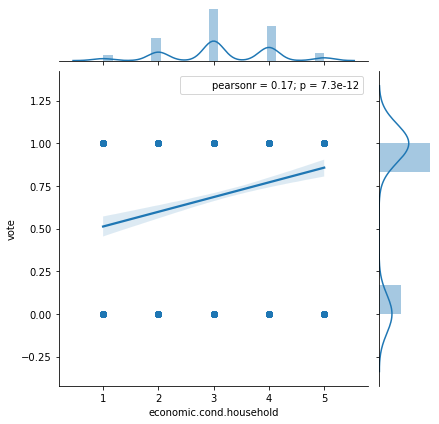

In [56]:
sns.jointplot(df['economic.cond.household'],df['vote'],kind='reg').annotate(stats.pearsonr)
plt.show()

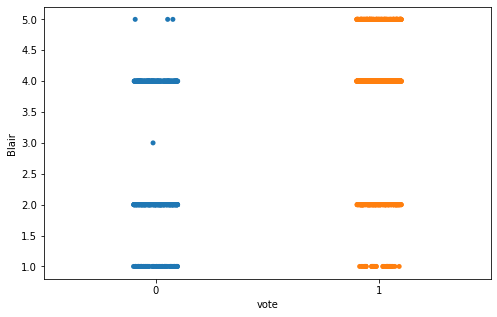

In [57]:

plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

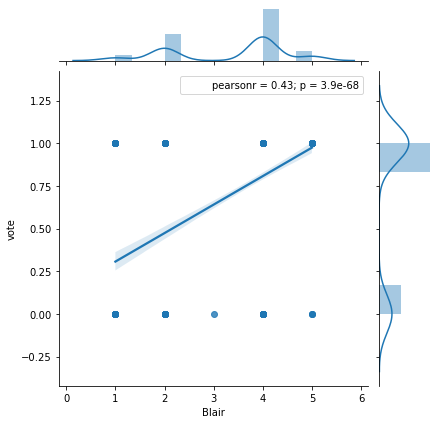

In [58]:
sns.jointplot(df['Blair'],df['vote'],kind='reg').annotate(stats.pearsonr)
plt.show()


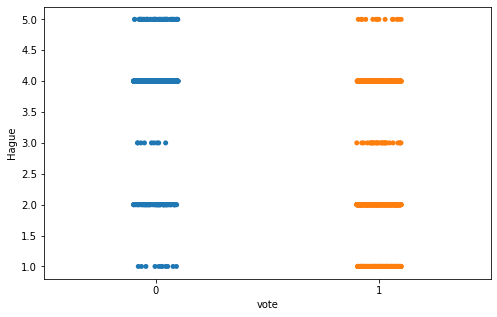

In [59]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

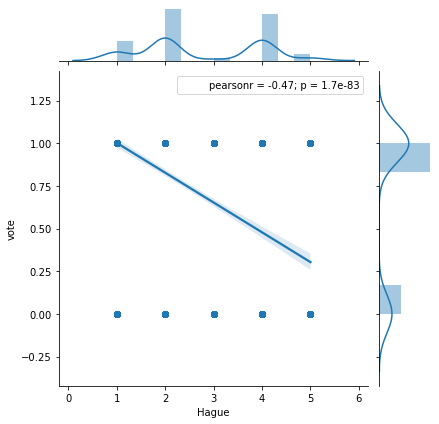

In [60]:
sns.jointplot(df['Hague'],df['vote'],kind='reg').annotate(stats.pearsonr)
plt.show()

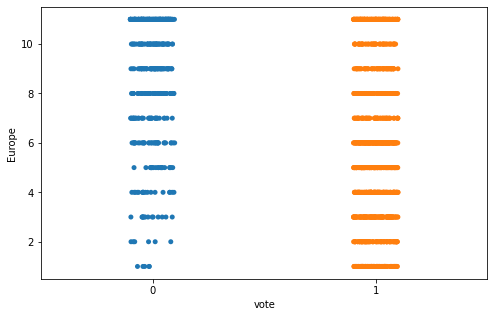

In [61]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

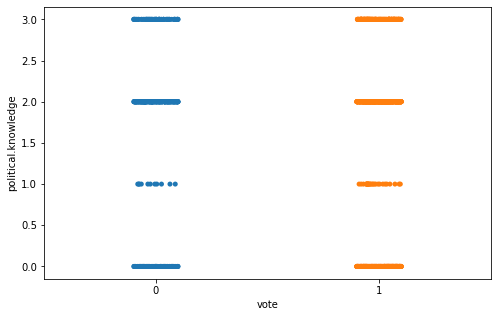

In [62]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

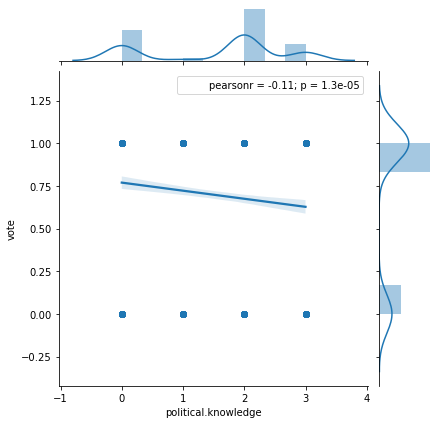

In [63]:
sns.jointplot(df['political.knowledge'],df['vote'],kind='reg').annotate(stats.pearsonr)
plt.show()

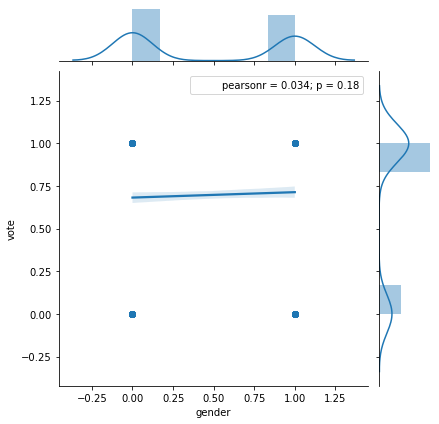

In [64]:
sns.jointplot(df['gender'],df['vote'],kind='reg').annotate(stats.pearsonr)
plt.show()

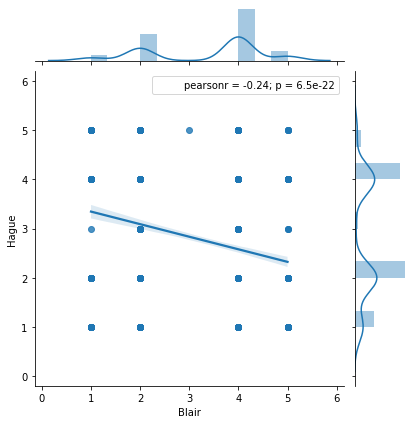

In [65]:
sns.jointplot(df['Blair'],df['Hague'],kind='reg').annotate(stats.pearsonr)
plt.show()

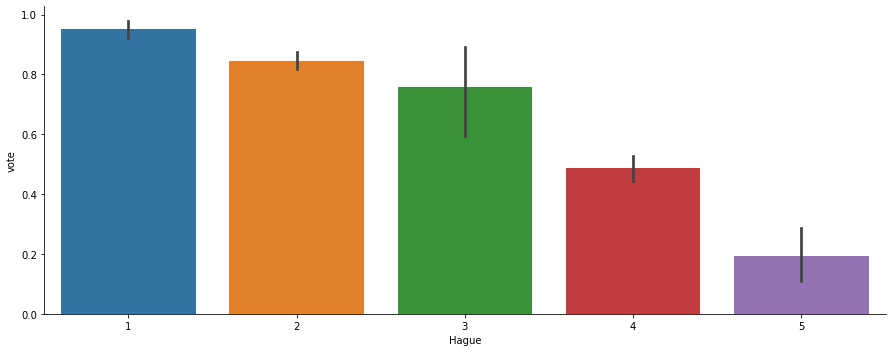

In [66]:
# Factor plot of Hague  vs vote
sns.factorplot(x='Hague',y='vote',data=df,kind='bar',aspect=2.5 )

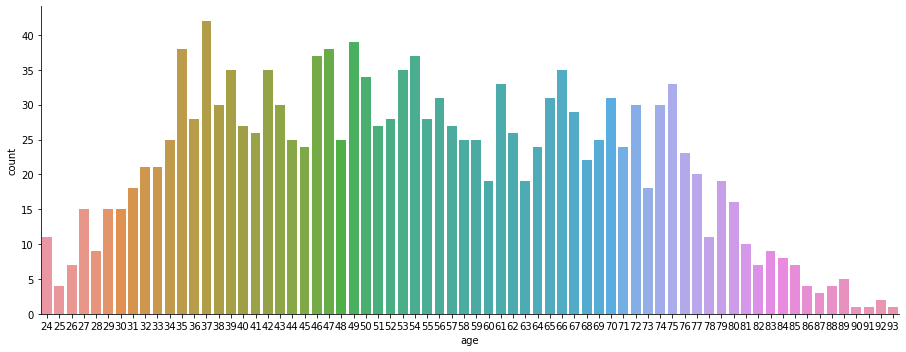

In [67]:

sns.factorplot(x='age', data=df , kind='count',aspect=2.5 )

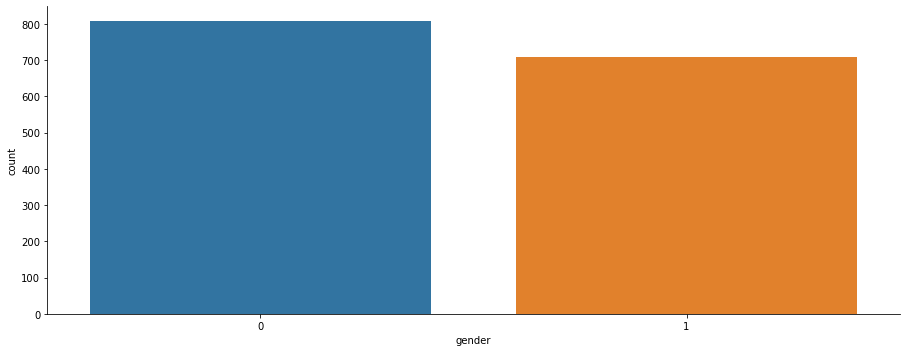

In [68]:

sns.factorplot(x='gender', data=df , kind='count',aspect=2.5 )

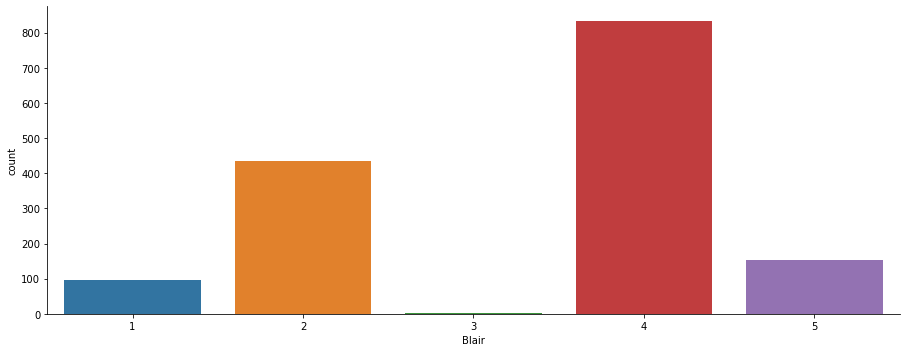

In [69]:
sns.factorplot(x='Blair', data=df , kind='count',aspect=2.5 )

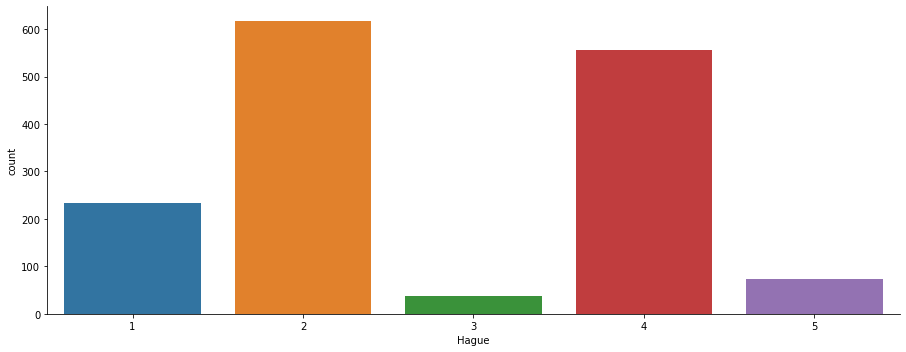

In [70]:
# Factor plot of Color vs Price
sns.factorplot(x='Hague', data=df , kind='count',aspect=2.5 )

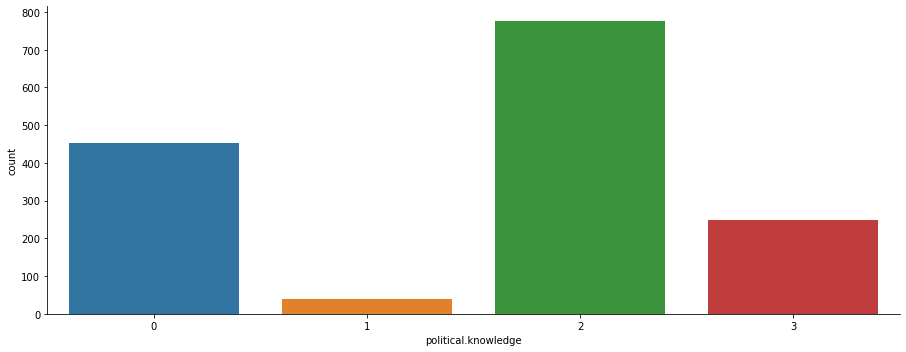

In [71]:
# Factor plot of Color vs Price
sns.factorplot(x='political.knowledge', data=df , kind='count',aspect=2.5 )

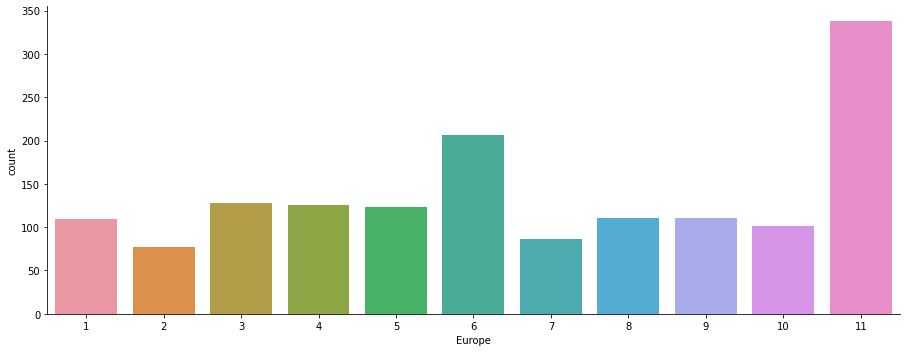

In [72]:
# Factor plot of Color vs Price
sns.factorplot(x='Europe', data=df , kind='count',aspect=2.5 )

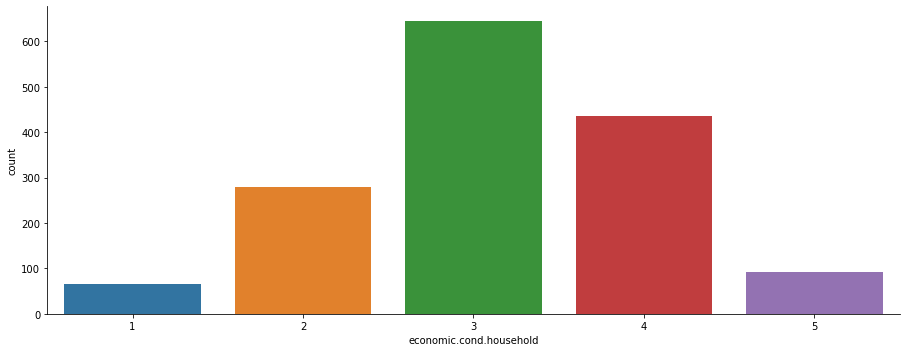

In [73]:
# Factor plot of Color vs Price
sns.factorplot(x='economic.cond.household', data=df , kind='count',aspect=2.5 )

In [74]:
df.Blair.value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

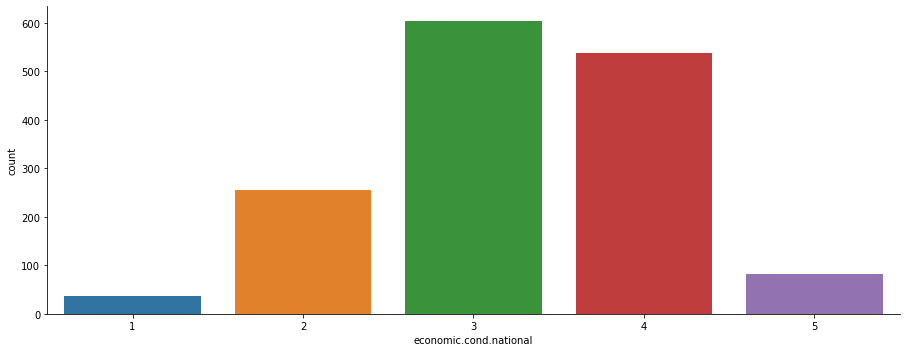

In [75]:
# Factor plot of Color vs Price
sns.factorplot(x='economic.cond.national', data=df , kind='count',aspect=2.5 )

In [76]:
df['economic.cond.national'].value_counts()

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

In [77]:
df['age'].value_counts()

37    42
49    39
47    38
35    38
46    37
      ..
87     3
92     2
91     1
90     1
93     1
Name: age, Length: 70, dtype: int64

In [78]:
df.gender.value_counts()

0    808
1    709
Name: gender, dtype: int64

In [79]:
df.Europe.value_counts()

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

In [80]:
df['economic.cond.household'].value_counts()

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [81]:
df['economic.cond.national'].value_counts()

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

In [82]:
df['Blair'].value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

In [83]:
df['Hague'].value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

<AxesSubplot:>

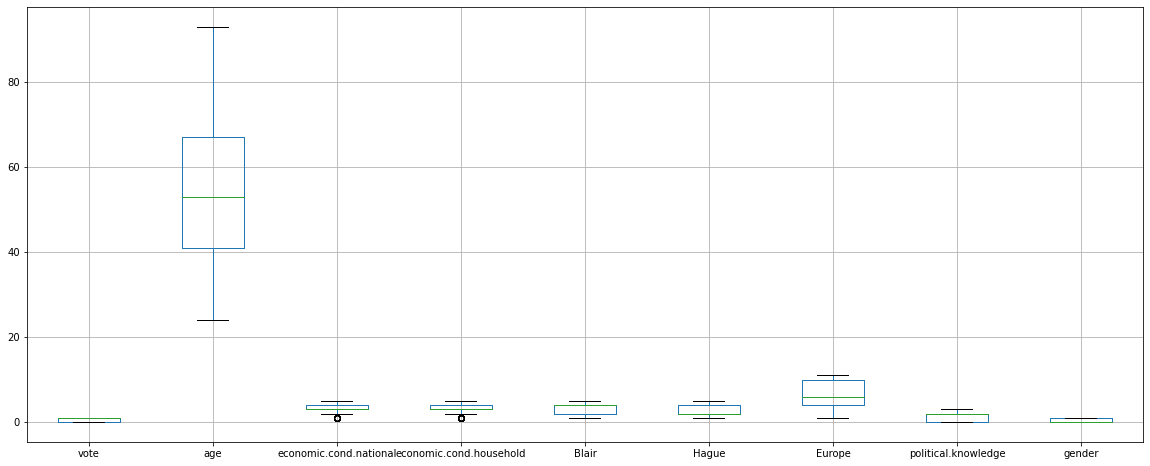

In [84]:
# continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
# data_plot=df[continuous]

# data_plot.boxplot(figsize=(15,10), rot=45);
plt.figure(figsize=(20,8))
df.boxplot()

It seems there are outliers in variables like economic. cond. national and economic. cond. household in data sets. We need to treat it.

Outlier Treatment:
Outlier Treatment Created a user defined function for finding the lower and upper range for a variable so that outlier can be treated. Imputation of Data: As outliers are present in the data, we will do impute the outliers with median () and categorical variable are imputed with mode (). After imputation we see the outliers are mostly treated in data. Very small number of outliers are present, which is also not significant as it will not affect much on Predictions.


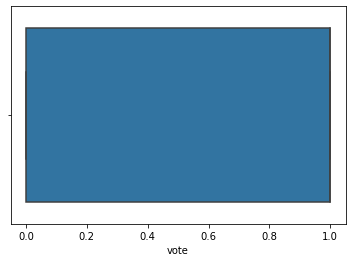

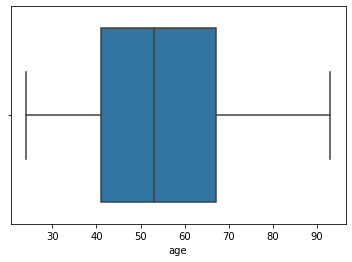

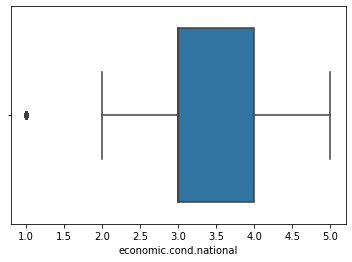

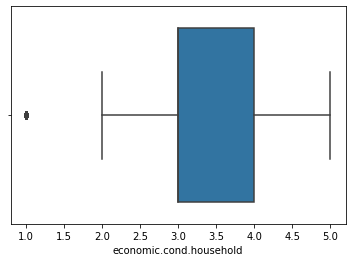

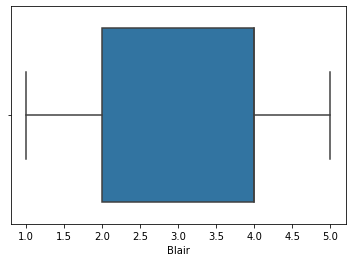

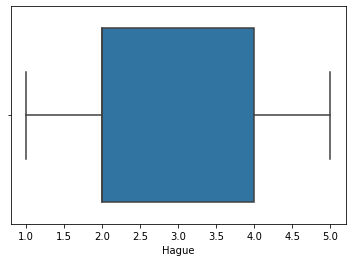

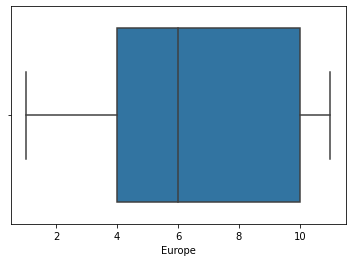

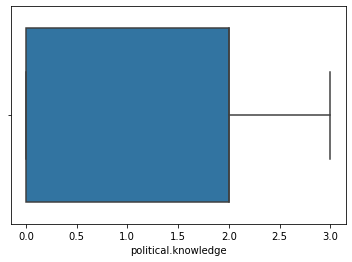

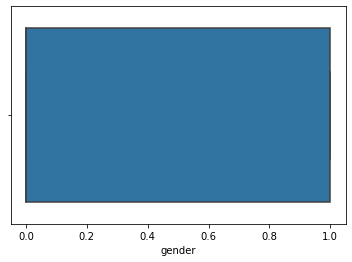

In [85]:
cols=['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'];

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [86]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [87]:
for column in df[cols].columns:

    
    lr,ur=remove_outlier(df['economic.cond.national'])
    df['economic.cond.national']=np.where(df['economic.cond.national']>ur,ur,df['economic.cond.national'])
    df['economic.cond.national']=np.where(df['economic.cond.national']<lr,lr,df['economic.cond.national'])
     
    lr,ur=remove_outlier(df['economic.cond.household'])
    df['economic.cond.household']=np.where(df['economic.cond.household']>ur,ur,df['economic.cond.household'])
    df['economic.cond.household']=np.where(df['economic.cond.household']<lr,lr,df['economic.cond.household'])
    
    lr,ur=remove_outlier(df['political.knowledge'])
    df['political.knowledge']=np.where(df['political.knowledge']>ur,ur,df['political.knowledge'])
    df['political.knowledge']=np.where(df['political.knowledge']<lr,lr,df['political.knowledge'])
    

<AxesSubplot:>

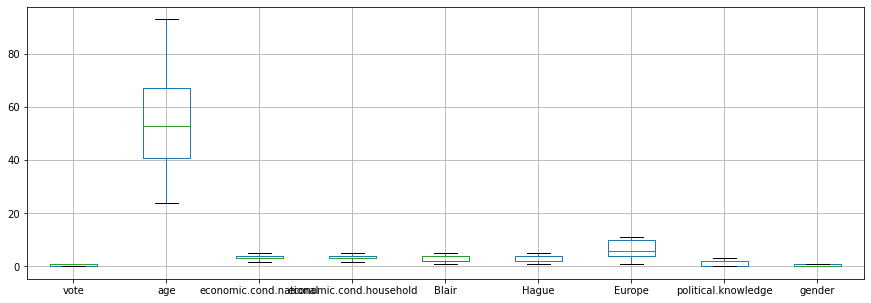

In [88]:
plt.figure(figsize=(15,5))
df.boxplot()

There are no outliers now in data after outlier treatment 

Splitting the data into training and test set for independent attribute The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

Before doing the data split ,variable types were checked .
As there are two columns with the type as object ,these variables were converted into categorical type. 
Then target variable was captured into seperate vector for training the test data set. 
If the dataset was split into train and test in the ratio of 70:30

Proportion in the Target Column

In [89]:
df['vote'].value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

<AxesSubplot:>

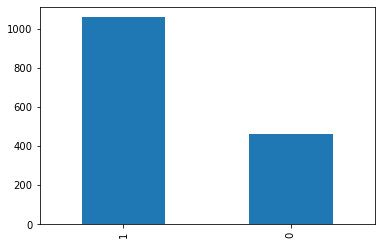

In [90]:
df['vote'].value_counts().plot(kind='bar')

In [91]:
df['vote'].unique()

array([1, 0], dtype=int8)

In [92]:
df.groupby('vote').mean()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
0,56.841304,2.864130,2.921739,2.576087,3.623913,8.663043,1.723913,0.441304
1,53.109745,3.428571,3.262535,3.666036,2.368969,5.903500,1.460738,0.478713


1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (3 pts). Interpret the inferences of both model s (2 pts) 5

In [93]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Split the dataset into training and test sets in 70:30 ratio

In [94]:
# Copy all the predictor variables into X dataframe
X = df.drop(['vote'],axis=1)

# Copy target into the y dataframe. 
y = df[['vote']]

In [95]:
# Data Split(70:30)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.3, random_state=0)


The above script splits 70% of the data to training set while 30% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

In [97]:
print('Number of rows and columns of the training set for the independent variables:',X_train_LR.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train_LR.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test_LR.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test_LR.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


Building Logistic Regression Model 

In [98]:

Logistic_Model = LogisticRegression(solver='liblinear',max_iter=100,tol=0.0001,penalty ='l2',verbose = True, n_jobs=2)


Fitting the Logistic Regression model 

In [99]:
Logistic_Model.fit(X_train_LR,y_train_LR)

[LibLinear]

LogisticRegression(n_jobs=2, solver='liblinear', verbose=True)

Predicting on Training and Test dataset for Logistic Regression Model

In [100]:
# training data prediction 
y_train_predict_LR=Logistic_Model.predict(X_train_LR)
# test data prediction 
y_test_prediction_LR=Logistic_Model.predict(X_test_LR)

Getting the Predicted Classes and Probs for Logistic Regression Model

In [101]:
# Train Data
y_train_predict_prob=Logistic_Model.predict_proba(X_train_LR)

pd.DataFrame(y_train_predict_prob).head()

,0,1
0,0.406765,0.593235
1,0.026292,0.973708
2,0.369711,0.630289
3,0.035239,0.964761
4,0.092583,0.907417


In [102]:
# Test data
y_test_predict_prob=Logistic_Model.predict_proba(X_test_LR)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.347335,0.652665
1,0.476932,0.523068
2,0.095770,0.904230
3,0.939055,0.060945
4,0.699013,0.300987


Evaluation metrics fro Logistic Regression Model

In [103]:

# Accuracy of logistic regression classifier on train set: 0.831

In [104]:
Logistic_Model_train_acc=Logistic_Model.score(X_train_LR,y_train_LR)
Logistic_Model_train_acc

0.8312912346842601

In [105]:
# Accuracy of logistic regression classifier on test set: 0.837

In [106]:
Logistic_Model_test_acc=Logistic_Model.score(X_test_LR,y_test_LR)
Logistic_Model_test_acc

0.8377192982456141

AUC and ROC for the training data for Logistic Regression Model

No handles with labels found to put in legend.


AUC: 0.888


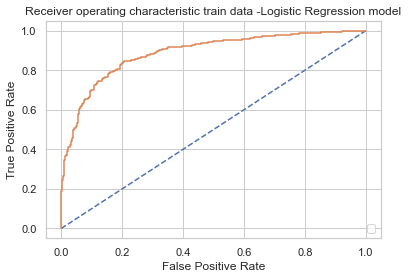

In [107]:
# predict probabilities
probs = Logistic_Model.predict_proba(X_train_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logist_train_auc = roc_auc_score(y_train_LR, probs)
print('AUC: %.3f' % Logist_train_auc)
# calculate roc curve
Logist_train_fpr,Logist_train_tpr,Logist_train_thresholds = roc_curve(y_train_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logist_train_fpr, Logist_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Logistic Regression model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AUC and ROC for the test data for Logistic Model

No handles with labels found to put in legend.


AUC: 0.891


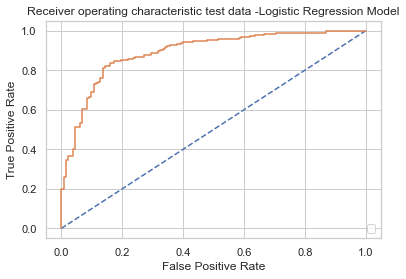

In [108]:
# predict probabilities
probs = Logistic_Model.predict_proba(X_test_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logist_test_auc = roc_auc_score(y_test_LR, probs)
print('AUC: %.3f' % Logist_test_auc)
# calculate roc curve
Logist_test_fpr, Logist_test_tpr, Logist_testthresholds = roc_curve(y_test_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logist_test_fpr, Logist_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -Logistic Regression Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Confusion Matrix for the training data

In [109]:
y_train_predict = Logistic_Model.predict(X_train_LR)
y_test_predict = Logistic_Model.predict(X_test_LR)

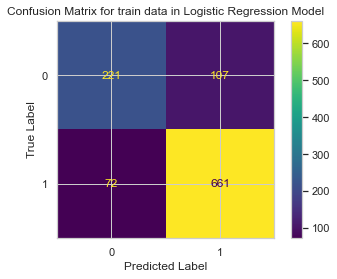

In [110]:
plot_confusion_matrix(Logistic_Model,X_train_LR,y_train_LR)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data in Logistic Regression Model')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

TP-A true positive is an outcome where the model correctly predicts the positive class(661)
TN- A true Negative is an outcome termed negative that the model has successfully predicted(221)
FP-A false postive is an outcome which is predicted yes but in actual it is no(107)
FN-A false negative is a n outcome which is predicted No but it is actual Yes(72)
This confusion matrix for train data in Logistic Regression Model says that we have 179 as total incorrect predictions and 882 are the total correct predictions .


Classification report for train data in Logistic Regression Model 

In [111]:
print(classification_report(y_train_LR,y_train_predict))


              precision    recall  f1-score   support

           0       0.75      0.67      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [112]:
confusion_matrix(y_train_LR, y_train_predict_LR)

array([[221, 107],
       [ 72, 661]], dtype=int64)

Interpretation that 83  % of the vote were given to Labour party ,Recall is 90% ,Precision is 86b% and F1 -score is 88% .These figures looks great and model is a overall a good model .

In [113]:
Logist_metrics=classification_report(y_train_LR, y_train_predict,output_dict=True)
df=pd.DataFrame(Logist_metrics).transpose()
Logist_train_precision=round(df.loc["1"][0],2)
Logist_train_recall=round(df.loc["1"][1],2)
Logist_train_f1=round(df.loc["1"][2],2)
print ('Logist_train_precision ',Logist_train_precision)
print ('Logist_train_recall ',Logist_train_recall)
print ('Logist_train_f1 ',Logist_train_f1)

Logist_train_precision  0.86
Logist_train_recall  0.9
Logist_train_f1  0.88


Confusion Matrix for test data

In [114]:
y_train_predict_LR = Logistic_Model.predict(X_train_LR)
y_test_predict_LR = Logistic_Model.predict(X_test_LR)

In [115]:
confusion_matrix(y_test_LR, y_test_predict_LR)

array([[ 87,  45],
       [ 29, 295]], dtype=int64)

TP-A true positive is an outcome where the model correctly predicts the positive class(295) TN- A true Negative is an outcome termed negative that the model has successfully predicted(87) FP-A false postive is an outcome which is predicted yes but in actual it is no(45) FN-A false negative is a n outcome which is predicted No but it is actual Yes(29). This confusion matrix for test data in Logistic Regression Model says that we have 74 as total incorrect predictions and 382 are the total correct predictions .

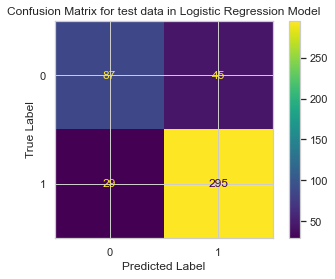

In [116]:
plot_confusion_matrix(Logistic_Model,X_test_LR, y_test_LR)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data in Logistic Regression Model')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

This confusion matrix for test data in Logistic Regression Model says that we have 45+29 as total incorrect prediction and 87+295 as total correct prediction.


Confusion Matrix for test data in Logistic Regression Model 

In [117]:
print(classification_report(y_test_LR, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       132
           1       0.87      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.78      0.80       456
weighted avg       0.83      0.84      0.83       456



Interpretation that 84 % of the vote were given to Labour party ,Recall is 91% ,Precision is 87% and F1 -score is 89% .These figures looks great and model is a overall a good model . 


In [118]:
Logist_metrics=classification_report(y_test_LR, y_test_predict,output_dict=True)
df=pd.DataFrame(Logist_metrics).transpose()
Logist_test_precision=round(df.loc["1"][0],2)
Logist_test_recall=round(df.loc["1"][1],2)
Logist_test_f1=round(df.loc["1"][2],2)
print ('Logist_test_precision ',Logist_test_precision)
print ('Logist_test_recall ',Logist_test_recall)
print ('Logist_test_f1 ',Logist_test_f1)

Logist_test_precision  0.87
Logist_test_recall  0.91
Logist_test_f1  0.89


Applying GridSearchCV for Logistic Regression

In [119]:
grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','newton_cg','liblinear'],
      'max_iter':[100,1000,10000],
      'tol':[0.0001,0.00001,.001]}

In [120]:
model = LogisticRegression(max_iter=100,n_jobs=2)

In [121]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [122]:
grid_search.fit(X_train_LR, y_train_LR)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=2), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'newton_cg', 'liblinear'],
                         'tol': [0.0001, 1e-05, 0.001]},
             scoring='f1')

In [123]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=1000, n_jobs=2, solver='sag', tol=1e-05)


In [124]:
best_model = grid_search.best_estimator_

In [125]:
# Prediction on the training set for grid search applied Logistic Regression Model


ytrain_predict = best_model.predict(X_train_LR)
ytest_predict = best_model.predict(X_test_LR)

In [126]:
## Getting the probabilities on the test set for grid search applied Logistic Regression Model

ytest_predict_prob=best_model.predict_proba(X_test_LR)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.347361,0.652639
1,0.479395,0.520605
2,0.095874,0.904126
3,0.938720,0.061280
4,0.698707,0.301293


              precision    recall  f1-score   support

           0       0.75      0.67      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 



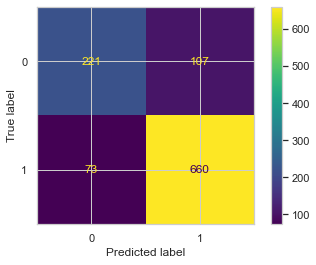

In [127]:
#  Confusion matrix on the training data for grid search applied Logistic  Regression Model 

plot_confusion_matrix(best_model,X_train_LR,y_train_LR)
print(classification_report(y_train_LR, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       132
           1       0.87      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.78      0.80       456
weighted avg       0.83      0.84      0.83       456
 



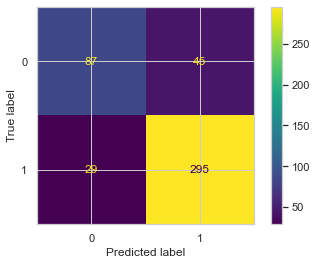

In [128]:
#  #  Confusion matrix on the test data for grid search applied Logistic Model 

plot_confusion_matrix(best_model,X_test_LR,y_test_LR)
print(classification_report(y_test_LR, ytest_predict),'\n');

LDA Model

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [130]:
df = pd.read_excel('Election_Data(1).xlsx', sheet_name = 'Election_Dataset_Two Classes')
df.head()
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [131]:
#Label Encoding has been done and all object columns are converted to number.
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [132]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [133]:
# Copy all the predictor variables into X dataframe
X = df.drop(['vote'],axis=1)

# Copy target into the y dataframe. 
y = df[['vote']]

Build LDA Model

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
X_train_LDA,X_test_LDA,y_train_LDA,y_test_LDA=train_test_split(X,y,test_size=.30,random_state=1)

In [135]:
# Implement the LinearDiscriminant Analysis

In [136]:
LDA_Model = LinearDiscriminantAnalysis()


Fit the LDA model on train data 

In [137]:

LDA_Model.fit(X_train_LDA,y_train_LDA)

LinearDiscriminantAnalysis()

In [138]:
posterior = LDA_Model.decision_function(X_train_LDA)
print(posterior)
print(np.exp(posterior))

[-0.60179463  1.65166302  1.49278281 ...  1.27423065  3.00701596
  0.36988528]
[ 0.54782761  5.21564636  4.44946029 ...  3.5759492  20.22695171
  1.44756854]


Prediction and Evaluation on both Training and Test Set using Confusion Matrix, Classification Report and AUC-ROC for LDA model

In [139]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_LDA= LDA_Model.predict(X_train_LDA)
print(pred_class_train_LDA)


[0 1 1 ... 1 1 1]


In [140]:
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_LDA = LDA_Model.predict(X_test_LDA)

print(pred_class_test_LDA)

[0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 1 0 1 1]


In [141]:
ytest_predict_prob_LDA=LDA_Model.predict_proba(X_test_LDA)
pd.DataFrame(ytest_predict_prob_LDA).head()

,0,1
0,0.952522,0.047478
1,0.741265,0.258735
2,0.328720,0.671280
3,0.486416,0.513584
4,0.139250,0.860750


In [142]:
ytrain_predict_prob_LDA=LDA_Model.predict_proba(X_train_LDA)
pd.DataFrame(ytrain_predict_prob_LDA).head()

,0,1
0,0.646067,0.353933
1,0.160884,0.839116
2,0.183504,0.816496
3,0.132531,0.867469
4,0.039819,0.960181


In [143]:
# Training Data Probability Prediction in LDA MOdel
# ?model.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train_LDA = LDA_Model.predict_proba(X_train_LDA)

# Test Data Probability Prediction in LDA MOdel 
pred_prob_test_LDA = LDA_Model.predict_proba(X_test_LDA)


Plotting confusion matrix for the different models for the Training and test data in Linear Discriminate Analysis Model

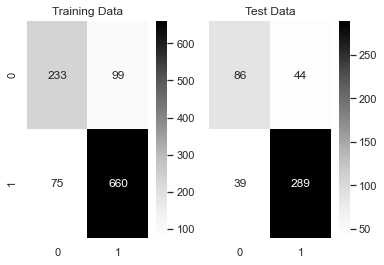

In [144]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_LDA,pred_class_train_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test_LDA,pred_class_test_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

TP-A true positive is an outcome where the model correctly predicts the positive class(660) TN- A true Negative is an outcome termed negative that the model has successfully predicted(223) FP-A false postive is a outcome which is predicted yes but in actual it is no(99) FN-A false negative is a n outcome which is predicted No but it is actual Yes(75) This confusion matrix for train data in Logistic Regression Model says that we have 174 as total incorrect predictions and 883 are the total correct predictions .

TP-A true positive is an outcome where the model correctly predicts the positive class(289) TN- A true Negative is an outcome termed negative that the model has successfully predicted(86) FP-A false postive is a outcome which is predicted yes but in actual it is no(44) FN-A false negative is a n outcome which is predicted No but it is actual Yes(39) This confusion matrix for train data in Logistic Regression Model says that we have 73 as total incorrect predictions and 375 are the total correct predictions .

LDA Model accuracy Score for train Data

In [145]:
LDA_train_acc=LDA_Model.score(X_train_LDA,y_train_LDA)
LDA_train_acc

0.8369259606373008

LDA Model accuracy score for test data 

In [146]:
LDA_test_acc=LDA_Model.score(X_test_LDA,y_test_LDA)
LDA_test_acc

0.8187772925764192

Evaluation metrics classification report ,confusion matrix for train  and test data in LDA MOdel 

In [147]:
LDA_metrics=classification_report(y_train_LDA,pred_class_train_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][0],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_f1=round(df.loc["1"][2],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.87
LDA_train_recall  0.9
LDA_train_f1  0.88


In [148]:
LDA_metrics=classification_report(y_test_LDA,pred_class_test_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][0],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_f1=round(df.loc["1"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.87
LDA_test_recall  0.88
LDA_test_f1  0.87


Classification Report of training and Test data in LDA Model

In [149]:
print('Classification Report of the training data-LDA Model:\n\n',metrics.classification_report(y_train_LDA,pred_class_train_LDA),'\n')
print('Classification Report of the test data-LDA Model:\n\n',metrics.classification_report(y_test_LDA,pred_class_test_LDA),'\n')

Classification Report of the training data-LDA Model:

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067
 

Classification Report of the test data-LDA Model:

               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



In [150]:
# Training Data Probability Prediction in LDA Model
# ?model.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train_LDA = LDA_Model.predict_proba(X_train_LDA)

# Test Data Probability Prediction in LDA Model
pred_prob_test_LDA = LDA_Model.predict_proba(X_test_LDA)

No handles with labels found to put in legend.


AUC: 0.888


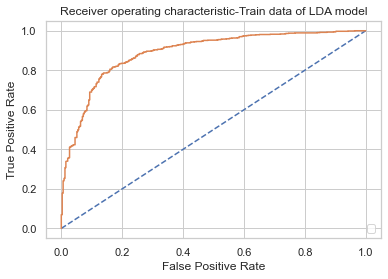

No handles with labels found to put in legend.


AUC: 0.889


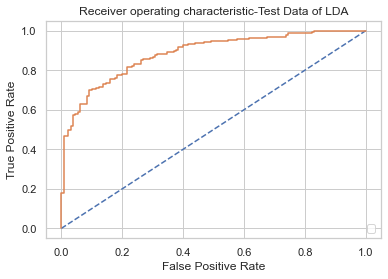

In [151]:
# AUC and ROC for the training data in LDA MOdel
# predict probabilities
probs = LDA_Model.predict_proba(X_train_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train_LDA, probs)
print('AUC: %.3f' % Logist_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Train data of LDA model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# AUC and ROC for the test data in LDA Model

# predict probabilities
probs = LDA_Model.predict_proba(X_test_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test_LDA, probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Test Data of LDA')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Applying grid search on Linear Discriminate Analysis

In [152]:
param_grid = { 'solver':['svd','lsqr','eigen'], 'tol':[0.1,.001,.01],'shrinkage':['auto','float','none']}
lda_model= LinearDiscriminantAnalysis()



In [153]:
grid_search = GridSearchCV(estimator = lda_model, param_grid = param_grid, cv = 5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train_LDA, y_train_LDA)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.1, 0.001, 0.01]},
             scoring='f1')

In [154]:
# grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 5)
# grid_search
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1}

In [155]:
best_grid = grid_search.best_estimator_
best_grid

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.1)

In [156]:
# Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train_LDA)
ytest_predict = best_grid.predict(X_test_LDA)

In [157]:
# Performance Evaluation of training data on grid serach applied LDA model
confusion_matrix(y_train_LDA,ytrain_predict)

array([[238,  94],
       [ 76, 659]], dtype=int64)

In [158]:
LDAg_train_acc=best_grid.score(X_train_LDA,y_train_LDA) 
LDAg_train_acc

0.8406747891283973

In [159]:
print(classification_report(y_train_LDA,ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       332
           1       0.88      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



Area under Curve is 0.8895111056470781


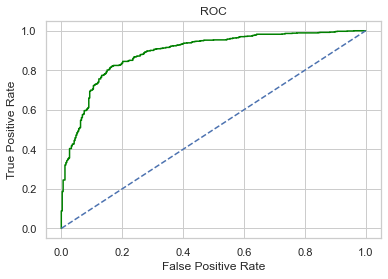

In [160]:
LDAg_train_fpr, LDAg_train_tpr,_=roc_curve(y_train_LDA,best_grid.predict_proba(X_train_LDA)[:,1])
plt.plot(LDAg_train_fpr,LDAg_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDAg_train_auc=roc_auc_score(y_train_LDA,best_grid.predict_proba(X_train_LDA)[:,1])
print('Area under Curve is', LDAg_train_auc)

In [161]:
# Performance Evaluation of training data on grid serach applied LDA model

In [162]:
confusion_matrix(y_test_LDA,ytest_predict)

array([[ 89,  41],
       [ 40, 288]], dtype=int64)

In [163]:
LDAg_test_acc=best_grid.score(X_test_LDA,y_test_LDA)
LDAg_test_acc

0.8231441048034934

In [164]:
print(classification_report(y_test_LDA,ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Area under Curve is 0.8852720450281425


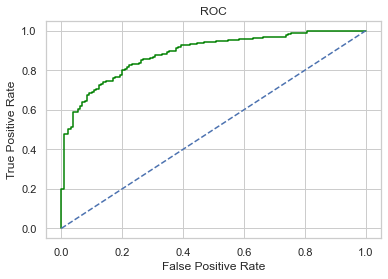

In [165]:
LDAg_test_fpr, LDAg_test_tpr,_=roc_curve(y_test_LDA,best_grid.predict_proba(X_test_LDA)[:,1])
plt.plot(LDAg_test_fpr,LDAg_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDAg_test_auc=roc_auc_score(y_test_LDA,best_grid.predict_proba(X_test_LDA)[:,1])
print('Area under Curve is', LDAg_test_auc)

In [166]:
# The model accuracy on the training as well as the test set is about 84 and 82 which is almost same .


In [167]:
# How to change the cut-off values for maximum accuracy?


0.1 

Accuracy Score 0.7535
F1 Score 0.8466 

Confusion Matrix


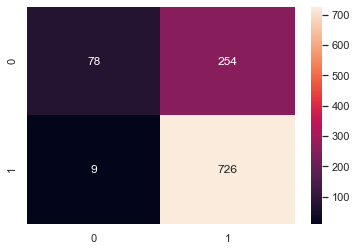

0.2 

Accuracy Score 0.7966
F1 Score 0.8679 

Confusion Matrix


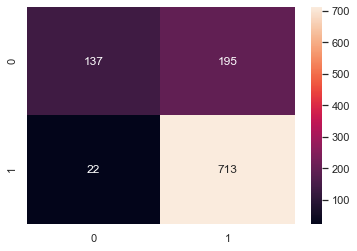

0.3 

Accuracy Score 0.8191
F1 Score 0.8784 

Confusion Matrix


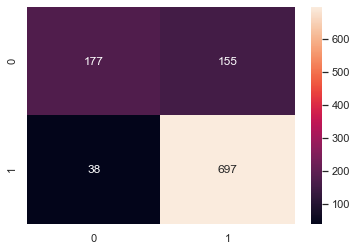

0.4 

Accuracy Score 0.8304
F1 Score 0.8824 

Confusion Matrix


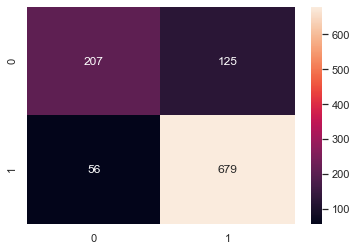

0.5 

Accuracy Score 0.8369
F1 Score 0.8835 

Confusion Matrix


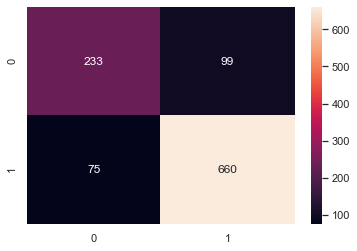

0.6 

Accuracy Score 0.8313
F1 Score 0.8757 

Confusion Matrix


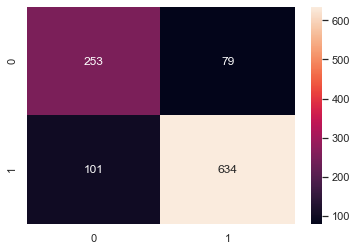

0.7 

Accuracy Score 0.8219
F1 Score 0.8647 

Confusion Matrix


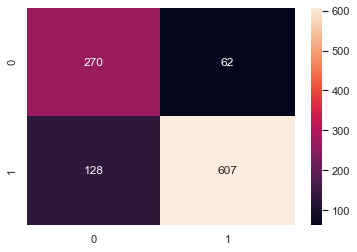

0.8 

Accuracy Score 0.7844
F1 Score 0.826 

Confusion Matrix


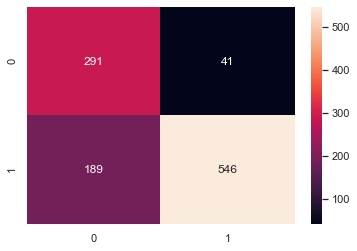

0.9 

Accuracy Score 0.6926
F1 Score 0.7253 

Confusion Matrix


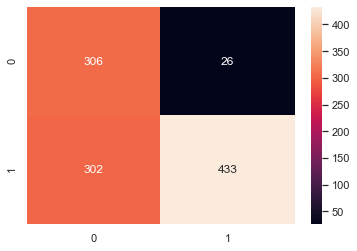

In [168]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train_LDA)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_LDA[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train_LDA,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train_LDA,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train_LDA,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [169]:

# But 0.3 cut-off gives us the best recall value,'f1-score'. Here, we will take the cut-off as 0.3 to get the optimum recall and 'f1' score.

In [170]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test_LDA[:,1])):
    if np.array(pred_prob_test_LDA[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [171]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test_LDA,pred_class_test_LDA),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test_LDA,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.78      0.53      0.63       130
           1       0.84      0.94      0.89       328

    accuracy                           0.83       458
   macro avg       0.81      0.74      0.76       458
weighted avg       0.82      0.83      0.81       458
 



In [172]:


# Comparison of the performance metrics from the 2 models(Logistic_Model and LDA_Model)

In [173]:
models=[Logistic_Model,LDA_Model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={Logistic_Model:'Logistic Regression model',LDA_Model:'Linear Discriminate model'}
for i in range(0,len(models)):
    if models[i]==Logistic_Model:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_train_LR,models[i].predict(X_train_LR)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_test_LR,models[i].predict(X_test_LR)),2)) )
    else:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_train_LDA,models[i].predict(X_train_LDA)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_test_LDA,models[i].predict(X_test_LDA)),2)) )

Accuracy Score for Train set for Logistic Regression model is 0.83
Accuracy Score for Test set for Logistic Regression model is 0.84
Accuracy Score for Train set for Linear Discriminate model is 0.84
Accuracy Score for Test set for Linear Discriminate model is 0.82


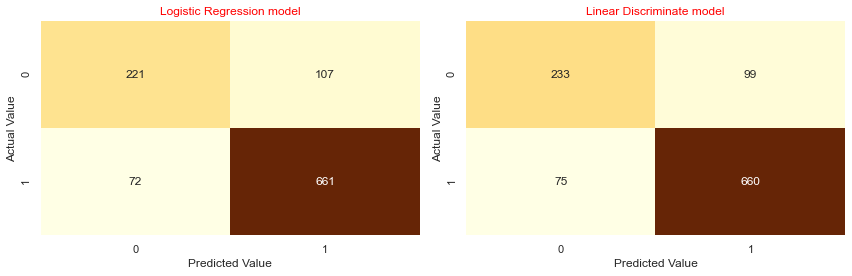

In [174]:
# Comparing the confusion matrices from Logistic Regression and LDA models for train set 
models=[Logistic_Model,LDA_Model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={Logistic_Model:'Logistic Regression model',LDA_Model:'Linear Discriminate model'}
fig=plt.figure(figsize=(12,4))
for i in range(0,len(models)):
    ax=fig.add_subplot(1,2,i+1)
    if models[i]==Logistic_Model:
        sns.heatmap(confusion_matrix(y_train_LR,models[i].predict(X_train_LR)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(y_train_LDA,models[i].predict(X_train_LDA)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
plt.tight_layout()

#    plot_confusion_matrix(modelLR,X_train,y_train)     

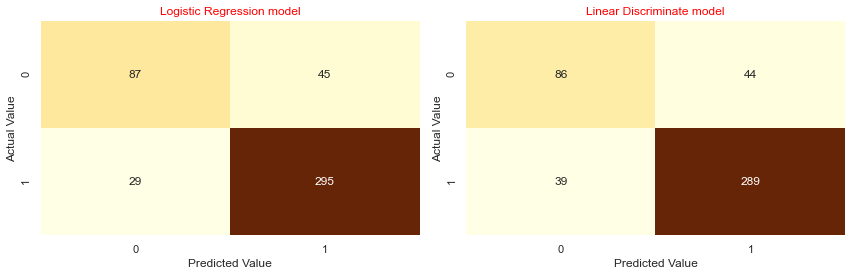

In [175]:
# Comparing the confusion matrices from Logistic Regression nd LDA models for train set: 
models=[Logistic_Model,LDA_Model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={Logistic_Model:'Logistic Regression model',LDA_Model:'Linear Discriminate model'}
fig=plt.figure(figsize=(12,4))
for i in range(0,len(models)):
    ax=fig.add_subplot(1,2,i+1)
    if models[i]==Logistic_Model:
        sns.heatmap(confusion_matrix(y_test_LR,models[i].predict(X_test_LR)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(y_test_LDA,models[i].predict(X_test_LDA)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
plt.tight_layout()

#    plot_confusion_matrix(modelLR,X_train,y_train)  

Area under the curve for Logistic Regression model is 0.888
Area under the curve for Linear Discriminate Analysis model is 0.889


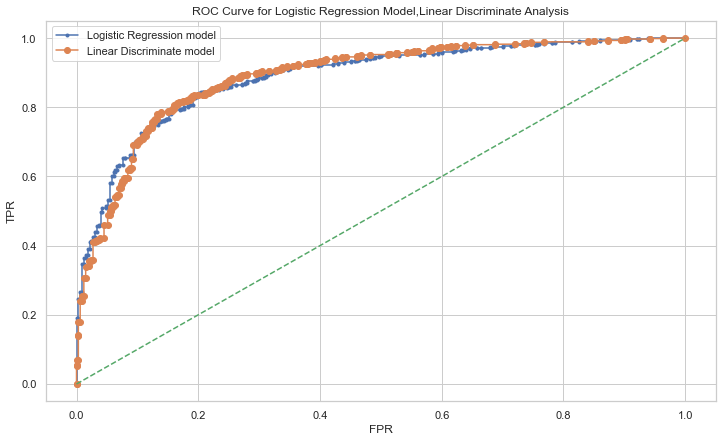

In [176]:

# Comparing area under curve for Logistic Regression and LDA models for train set:
models=[Logistic_Model,LDA_Model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={Logistic_Model:'Logistic Regression model',LDA_Model:'Linear Discriminate model'}
print('Area under the curve for Logistic Regression model is',
      round(roc_auc_score(y_train_LR,Logistic_Model.predict_proba(X_train_LR)[:,1]),3))
print('Area under the curve for Linear Discriminate Analysis model is',
      round(roc_auc_score(y_train_LDA,LDA_Model.predict_proba(X_train_LDA)[:,1]),3))


plt.figure(figsize=(12,7))
fpr_dtc,tpr_dtc,thresholds=roc_curve(y_train_LR,Logistic_Model.predict_proba(X_train_LR)[:,1])
plt.plot(fpr_dtc,tpr_dtc,marker='.')
fpr_rfc,tpr_rfc,thresholds=roc_curve(y_train_LDA,LDA_Model.predict_proba(X_train_LDA)[:,1])
plt.plot(fpr_rfc,tpr_rfc,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve for {}'.format('Logistic Regression Model,Linear Discriminate Analysis'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()



Area under the curve for Logistic Regression model is 0.891
Area under the curve for Linear Discriminate Analysis model is 0.884


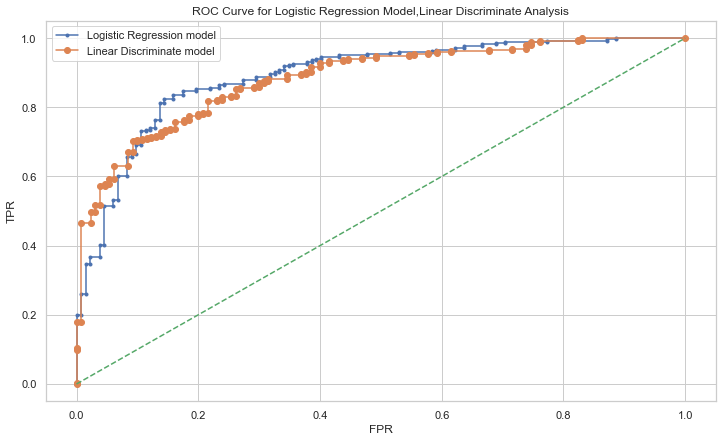

In [177]:

# Comparing area under curve for Logistic Regression and LDA models for test set:
models=[Logistic_Model,LDA_Model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={Logistic_Model:'Logistic Regression model',LDA_Model:'Linear Discriminate model'}
print('Area under the curve for Logistic Regression model is',
      round(roc_auc_score(y_test_LR,Logistic_Model.predict_proba(X_test_LR)[:,1]),3))
print('Area under the curve for Linear Discriminate Analysis model is',
      round(roc_auc_score(y_test_LDA,LDA_Model.predict_proba(X_test_LDA)[:,1]),3))


plt.figure(figsize=(12,7))
fpr_dtc,tpr_dtc,thresholds=roc_curve(y_test_LR,Logistic_Model.predict_proba(X_test_LR)[:,1])
plt.plot(fpr_dtc,tpr_dtc,marker='.')
fpr_rfc,tpr_rfc,thresholds=roc_curve(y_test_LDA,LDA_Model.predict_proba(X_test_LDA)[:,1])
plt.plot(fpr_rfc,tpr_rfc,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve for {}'.format('Logistic Regression Model,Linear Discriminate Analysis'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()



In [178]:
# Tabular comparasion of Accuracy ,AUC,Recall,Precesion,and F1-Score of Logistic & LDA model (Test & Train data):

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logist train':[Logistic_Model_train_acc,Logist_train_auc,Logist_train_recall,Logist_train_precision,Logist_train_f1],
        'Logist Test':[Logistic_Model_test_acc,Logist_test_auc,Logist_test_recall,Logist_test_precision,Logist_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1]},index=index)
round(data,2)


,Logist train,Logist Test,LDA Train,LDA Test
Accuracy,0.83,0.84,0.84,0.82
AUC,0.89,0.89,0.89,0.88
Recall,0.90,0.91,0.90,0.88
Precision,0.86,0.87,0.87,0.87
F1 Score,0.88,0.89,0.88,0.87


Logistic Regression Model Conclusion:

Train Data: Accuracy: 83 % AUC: 89 % ,Recall: 90 % ,Precision: 86% ,F1-Score:88 
Test Data:  Accuracy: 84 % AUC: 89 % ,Recall: 91 % ,Precision: 87% ,F1-Score:89
                        
Finally it is concluded that training and test set results are almost similar in terms of AUC,Accuracy,Precision and 
recall in Logistic Regression model.
But we can see that test data is performing one unit better than train data in accuracy ,Recall ,precision and F1-Score .
The Logistic model is showing a good recall of 91 % on test data so its pretty good model .



Linear Discriminant Analysis Model Conclusion:

Train Data: Accuracy: 84 % AUC: 89 % ,Recall: 90 % ,Precision: 87% ,F1-Score:88 
Test Data:  Accuracy: 82 % AUC: 88 % ,Recall: 88 % ,Precision: 87% ,F1-Score:87
                        
Finally it is concluded that training and test set results are almost similar in terms of AUC,Accuracy,Precision and 
recall in LDA model.
But we can see that test data is performing slightly poor than train data in accuracy ,Recall ,AUC and F1-Score .Precision for LDA model is exactly same for both train and test data .

Comparatively ,the Logistic model is showing a good recall of 91 % on test data so its pretty good model than the LDA model (88% on test data)


The cut off point of 0.3 on LDA model gives better accuracy of 83% and better recall values 95%.

1.5) Apply KNN Model and Naïve Bayes Model(5 pts). Interpret the inferences of each model (2 pts)
	7

KNN Model
For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN

In [179]:
# Import the libraries:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df = pd.read_excel('Election_Data(1).xlsx', sheet_name = 'Election_Dataset_Two Classes')
df.head()
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [181]:
# drop the first column from the data frame. This is Id column which is not used in modeling

In [182]:
df.shape

(1525, 9)

In [183]:


for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')



VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [184]:
#Label Encoding has been done and all object columns are converted to number.
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [185]:
# Arrange data into independent variables and dependent variables
# # Create a separate dataframe consisting only of the features i.e independent
X =  df.drop("vote",axis=1) ## Features
y = df["vote"]  ## Target

In [186]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1




Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN.


In [187]:
# Scaling for KNN Model
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances

In [188]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03
mean,1.013397e-16,-7.454875e-17,7.454875e-17,1.677347e-16,1.164824e-17,-1.327900e-16,-8.153769e-17,-5.125226e-17
std,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00
min,-1.921698e+00,-2.550189e+00,-2.302303e+00,-1.987695e+00,-1.419886e+00,-1.737782e+00,-1.424148e+00,-9.370586e-01
25%,-8.393129e-01,-2.792178e-01,-1.509476e-01,-1.136225e+00,-6.070758e-01,-8.277143e-01,-1.424148e+00,-9.370586e-01
50%,-7.527638e-02,-2.792178e-01,-1.509476e-01,5.667164e-01,-6.070758e-01,-2.210023e-01,4.226427e-01,-9.370586e-01
75%,8.160995e-01,8.562679e-01,9.247302e-01,5.667164e-01,1.018544e+00,9.924217e-01,4.226427e-01,1.067169e+00
max,2.471512e+00,1.991754e+00,2.000408e+00,1.418187e+00,1.831354e+00,1.295778e+00,1.346038e+00,1.067169e+00


In [189]:
XScaled.head()
# all column adjusted to zero mean and standard deviation to 1.

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [190]:
# Split X and y into training and test set in 70:30 ratio

X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(XScaled, y, test_size=0.30, random_state=0)

Build KNN Model



Build the model. Print the Accuracy of the model with different values of k=5,7,15,17

Hint: For accuracy use model.score()


In [191]:
KNN_model=KNeighborsClassifier(n_neighbors= 5,weights='uniform',algorithm='auto',n_jobs=None )

In [192]:
# Call Nearest Neighbour algorithm and fit the model

KNN_model.fit(X_train_KNN, y_train_KNN)


KNeighborsClassifier()

In [193]:
# KNeighborsClassifier?

Evaluate Performance of kNN Model

In [194]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
# 93.3 % of outr prediction turns out to be true .
predicted_labels = KNN_model.predict(X_test_KNN)
KNN_model.score(X_test_KNN, y_test_KNN)

0.8187772925764192

In [195]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
KNN_model_score_train = KNN_model.score(X_train_KNN, y_train_KNN)
print(KNN_model_score_train)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8706654170571696
[[251  77]
 [ 61 678]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       328
           1       0.90      0.92      0.91       739

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [196]:
## Performance Matrix on test data set
## Performance Matrix on train data set
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
KNN_model_score_test = KNN_model.score(X_test_KNN, y_test_KNN)
print(KNN_model_score_test)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

0.8187772925764192
[[ 99  35]
 [ 48 276]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       134
           1       0.89      0.85      0.87       324

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.82      0.82      0.82       458



No handles with labels found to put in legend.


AUC: 0.935


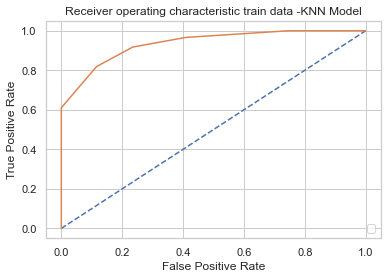

In [197]:
probs = KNN_model.predict_proba(X_train_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train_KNN, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_trainthresholds = roc_curve(y_train_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


No handles with labels found to put in legend.


AUC: 0.842


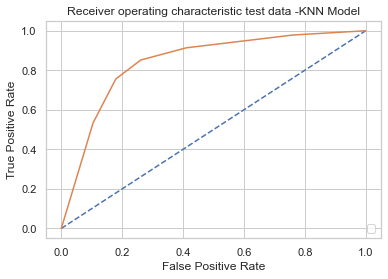

In [198]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test_KNN, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_testthresholds = roc_curve(y_test_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [199]:
KNN_metrics=classification_report(y_train_KNN,y_train_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df.loc["1"][0],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_f1=round(df.loc["1"][2],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.9
KNN_train_recall  0.92
KNN_train_f1  0.91


In [200]:
KNN_metrics=classification_report(y_test_KNN,y_test_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df.loc["1"][0],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_f1=round(df.loc["1"][2],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.89
KNN_test_recall  0.85
KNN_test_f1  0.87


Default value n_neighbors=5, lets check the performance for K=7

In [201]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier(n_neighbors=7)

In [202]:
## Performance Matrix on train data set
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
model_score_KNN_Train= KNN_model.score(X_train_KNN, y_train_KNN)
print(model_score_KNN_Train)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8622305529522024
[[243  85]
 [ 62 677]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       328
           1       0.89      0.92      0.90       739

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [203]:
## Performance Matrix on test data set
## Performance Matrix on train data set
## Performance Matrix on train data set
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
model_score_KNN_Test = KNN_model.score(X_test_KNN, y_test_KNN)
print(model_score_KNN_Test)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

0.8275109170305677
[[104  30]
 [ 49 275]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.72       134
           1       0.90      0.85      0.87       324

    accuracy                           0.83       458
   macro avg       0.79      0.81      0.80       458
weighted avg       0.84      0.83      0.83       458



In [204]:
print('Classification Report of the training data in KNN :\n\n',metrics.classification_report(y_train_KNN,y_train_predict_KNN),'\n')
print('Classification Report of the test data in KNN:\n\n',metrics.classification_report(y_test_KNN,y_test_predict_KNN),'\n')


Classification Report of the training data in KNN :

               precision    recall  f1-score   support

           0       0.80      0.74      0.77       328
           1       0.89      0.92      0.90       739

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067
 

Classification Report of the test data in KNN:

               precision    recall  f1-score   support

           0       0.68      0.78      0.72       134
           1       0.90      0.85      0.87       324

    accuracy                           0.83       458
   macro avg       0.79      0.81      0.80       458
weighted avg       0.84      0.83      0.83       458
 



Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [205]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_KNN, y_train_KNN)
    # evaluate test accuracy
    scores = knn.score(X_test_KNN, y_test_KNN)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.22707423580786024,
 0.17685589519650657,
 0.18122270742358082,
 0.17248908296943233,
 0.17685589519650657,
 0.16812227074235808,
 0.16375545851528384,
 0.16593886462882101,
 0.16157205240174677,
 0.16812227074235808]

Plot misclassification error vs k (with k value on X-axis) using matplotlib

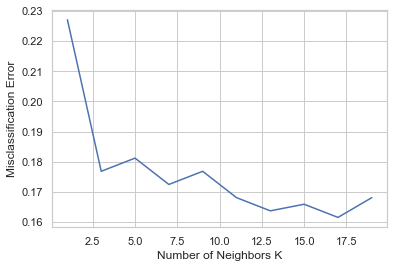

In [206]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 17 it is giving the best test accuracy lets check train and test both with other evaluation metrics

In [207]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier(n_neighbors=17)

In [208]:
## Performance Matrix on train data set
## Performance Matrix on train data set
y_train_predict_KNN_Train= KNN_model.predict(X_train_KNN)
model_score_KNN_Train = KNN_model.score(X_train_KNN, y_train_KNN)
print(model_score_KNN_Train)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8462980318650422
[[243  85]
 [ 62 677]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       328
           1       0.89      0.92      0.90       739

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [209]:
## Performance Matrix on test data set
## Performance Matrix on train data set
y_test_predict_KNN_Test= KNN_model.predict(X_test_KNN)
model_score_KNN_Test = KNN_model.score(X_test_KNN, y_test_KNN)
print(model_score_KNN_Test)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

0.8384279475982532
[[104  30]
 [ 49 275]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.72       134
           1       0.90      0.85      0.87       324

    accuracy                           0.83       458
   macro avg       0.79      0.81      0.80       458
weighted avg       0.84      0.83      0.83       458



In [210]:
0.846-0.838

0.008000000000000007

As the difference between train and test accuracies is less than 10%, it is a valid model

In [211]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_model, X_train_KNN, y_train_KNN, cv=10)
scores

array([0.85046729, 0.80373832, 0.86915888, 0.78504673, 0.8411215 ,
       0.8317757 , 0.85046729, 0.90566038, 0.80188679, 0.80188679])

In [212]:
scores = cross_val_score(KNN_model, X_test_KNN, y_test_KNN, cv=10)
scores

array([0.7826087 , 0.86956522, 0.82608696, 0.7826087 , 0.86956522,
       0.82608696, 0.84782609, 0.7826087 , 0.75555556, 0.86666667])

In [213]:
## After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. 
## Hence our model is valid.
## Students are advised to perform CV on other models and compare the results.

In [214]:
# Applying Grid search Cvon KNN model
# ?KNeighborsClassifier

In [215]:
param_grid = {'n_neighbors':[5,7,15,17],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','brute']}
KNN_model = KNeighborsClassifier()
# KNN_model=KNeighborsClassifier(n_neighbors= 5,weights='uniform',algorithm='auto',n_jobs=None )
                              
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier()

In [216]:
grid_search = GridSearchCV(estimator = KNN_model, param_grid = param_grid, cv = 5)

In [217]:
grid_search.fit(X_train_KNN,y_train_KNN)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute'],
                         'n_neighbors': [5, 7, 15, 17],
                         'weights': ['uniform', 'distance']})

In [218]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}

In [219]:
best_grid = grid_search.best_estimator_

In [220]:
best_grid

KNeighborsClassifier(n_neighbors=15)

In [221]:
# Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train_KNN)
ytest_predict = best_grid.predict(X_test_KNN)

In [222]:
# KNN Model Performance Evaluation on Training data
confusion_matrix(y_train_KNN,ytrain_predict)

array([[227, 101],
       [ 65, 674]], dtype=int64)

In [223]:
KNNg_train_acc=best_grid.score(X_train_KNN,y_train_KNN) 
KNNg_train_acc

0.8444236176194939

In [224]:
print(classification_report(y_train_KNN,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       328
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



Area under Curve is 0.9127075150995082


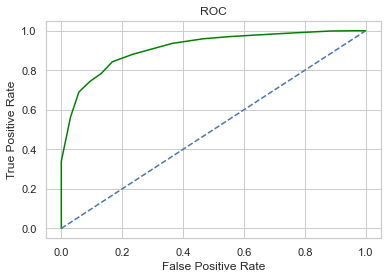

In [225]:
KNNg_train_fpr, KNNg_train_tpr,_=roc_curve(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
plt.plot(KNNg_train_fpr,KNNg_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNNg_train_auc=roc_auc_score(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
print('Area under Curve is', KNNg_train_auc)

In [226]:
# KNN Model Performance Evaluation on Test data

In [227]:
confusion_matrix(y_test_KNN,ytest_predict)

array([[ 98,  36],
       [ 40, 284]], dtype=int64)

In [228]:
KNNg_test_acc=best_grid.score(X_test_KNN,y_test_KNN)
KNNg_test_acc

0.834061135371179

In [229]:
print(classification_report(y_test_KNN,ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       134
           1       0.89      0.88      0.88       324

    accuracy                           0.83       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



Area under Curve is 0.9127075150995082


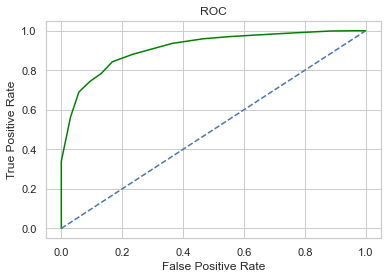

In [230]:
KNNg_train_fpr, KNNg_train_tpr,_=roc_curve(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
plt.plot(KNNg_train_fpr,KNNg_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNNg_train_auc=roc_auc_score(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
print('Area under Curve is', KNNg_train_auc)

Gaussian Naive Bayes


In [231]:
df = pd.read_excel('Election_Data(1).xlsx', sheet_name = 'Election_Dataset_Two Classes')
df.head()
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


Dealing with categorical data¶

Change all the classes to numericals with the help of pd.Categorical().codes and drop'Unnamed: 0 as it is insignificant and does not contain any information

In [232]:
#Label Encoding has been done and all object columns are converted to number.
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [233]:
# Arrange data into independent variables and dependent variables
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [234]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03
mean,1.013397e-16,-7.454875e-17,7.454875e-17,1.677347e-16,1.164824e-17,-1.327900e-16,-8.153769e-17,-5.125226e-17
std,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00
min,-1.921698e+00,-2.550189e+00,-2.302303e+00,-1.987695e+00,-1.419886e+00,-1.737782e+00,-1.424148e+00,-9.370586e-01
25%,-8.393129e-01,-2.792178e-01,-1.509476e-01,-1.136225e+00,-6.070758e-01,-8.277143e-01,-1.424148e+00,-9.370586e-01
50%,-7.527638e-02,-2.792178e-01,-1.509476e-01,5.667164e-01,-6.070758e-01,-2.210023e-01,4.226427e-01,-9.370586e-01
75%,8.160995e-01,8.562679e-01,9.247302e-01,5.667164e-01,1.018544e+00,9.924217e-01,4.226427e-01,1.067169e+00
max,2.471512e+00,1.991754e+00,2.000408e+00,1.418187e+00,1.831354e+00,1.295778e+00,1.346038e+00,1.067169e+00


In [235]:
# Split X and y into training and test set in 70:30 ratio
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(XScaled, y, test_size=0.30, random_state=0)

In [236]:
# GuassianNB classifier is built .After building the guassianNB classifier ,our model is ready to make predictions.

In [237]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [238]:
NB_model = GaussianNB()

In [239]:
# The GuassianNB classifier is trained using training data .To train the guassianNB classifier we will use fit() method.

In [240]:
# Fit the model

In [241]:
NB_model.fit(X_train_NB,y_train_NB)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

Performance Matrix on train data set

In [242]:
y_train_predict_NB = NB_model.predict(X_train_NB)
model_score_NB_Train = NB_model.score(X_train_NB, y_train_NB)                      ## Accuracy
print(model_score_NB_Train)
print(metrics.confusion_matrix(y_train_NB, y_train_predict_NB))          ## confusion_matrix
print(metrics.classification_report(y_train_NB, y_train_predict_NB))     ## classification_report

0.8388003748828491
[[235  93]
 [ 79 660]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       328
           1       0.88      0.89      0.88       739

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



No handles with labels found to put in legend.


AUC: 0.887


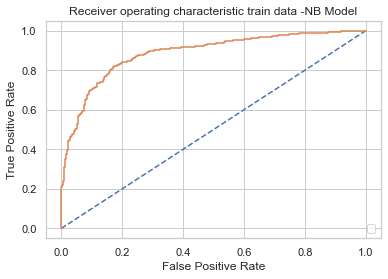

In [243]:
probs = NB_model.predict_proba(X_train_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train_NB, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_trainthresholds = roc_curve(y_train_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -NB Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [244]:
## Performance Matrix on test data set
y_test_predict_NB = NB_model.predict(X_test_NB)
model_score_NB_Test = NB_model.score(X_test_NB, y_test_NB)                      ## Accuracy
print(model_score_NB_Test)
print(metrics.confusion_matrix(y_test_NB, y_test_predict_NB))          ## confusion_matrix
print(metrics.classification_report(y_test_NB, y_test_predict_NB))     ## classification_report


0.8253275109170306
[[ 99  35]
 [ 45 279]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       134
           1       0.89      0.86      0.87       324

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



In [245]:
NB_metrics=classification_report(y_train_NB,y_train_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_f1=round(df.loc["1"][2],2)
print ('NB_train_precision',NB_train_precision)
print ('NB_train_recall',NB_train_recall)
print ('NB_train_f1',NB_train_f1)

NB_train_precision 0.88
NB_train_recall 0.89
NB_train_f1 0.88


In [246]:
NB_metrics=classification_report(y_test_NB,y_test_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.89
NB_test_recall  0.86
NB_test_f1  0.87


AUC: 0.887

No handles with labels found to put in legend.


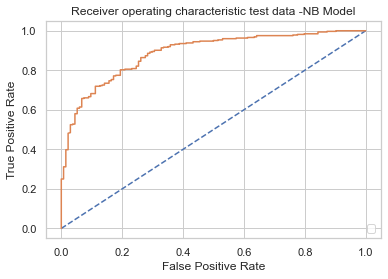

In [247]:
probs = NB_model.predict_proba(X_test_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test_NB, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_testthresholds = roc_curve(y_test_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -NB Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [248]:
print('Classification Report of the training data in NB_model:\n\n',metrics.classification_report(y_train_NB,y_train_predict_NB),'\n')
print('Classification Report of the test data in NB_model:\n\n',metrics.classification_report(y_test_NB,y_test_predict_NB),'\n')

Classification Report of the training data in NB_model:

               precision    recall  f1-score   support

           0       0.75      0.72      0.73       328
           1       0.88      0.89      0.88       739

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

Classification Report of the test data in NB_model:

               precision    recall  f1-score   support

           0       0.69      0.74      0.71       134
           1       0.89      0.86      0.87       324

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458
 



Accuracy of our Gaussian Naive Bayes model

In [249]:
NB_model.score(X_train_NB, y_train_NB)

0.8388003748828491

In [250]:
NB_model.score(X_test_NB, y_test_NB)

0.8253275109170306

**Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

In [251]:
# Comparison of the performance metrics from the 2 models(gaussian NB and KNN_Model)

In [252]:
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'KNN model',NB_model:'NB model'}
for i in range(0,len(models)):
    if models[i]==KNN_model:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_train_KNN,models[i].predict(X_train_KNN)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_test_KNN,models[i].predict(X_test_KNN)),2)) )
    else:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_train_NB,models[i].predict(X_train_NB)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],round(accuracy_score(y_test_NB,models[i].predict(X_test_NB)),2)) )

Accuracy Score for Train set for KNN model is 0.87
Accuracy Score for Test set for KNN model is 0.82
Accuracy Score for Train set for NB model is 0.84
Accuracy Score for Test set for NB model is 0.83


In [253]:

models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
for i in range(0,len(models)):
    if models[i]==KNN_model:
        print('Accuracy Score for Train set for{}is {}'.format(models_names[models[i]],round(accuracy_score(y_train_KNN,models[i].predict(X_train_KNN)),2)))
        print('Accuracy Score for Test set for{}is {}'.format(models_names[models[i]],round(accuracy_score(y_test_KNN,models[i].predict(X_test_KNN)),2)) )
    else:
        print('Accuracy Score for Train set for{}is {}'.format(models_names[models[i]],round(accuracy_score(y_train_NB,models[i].predict(X_train_NB)),2)))
        print('Accuracy Score for Test set for{}is {}'.format(models_names[models[i]],round(accuracy_score(y_test_NB,models[i].predict(X_test_NB)),2)) )

Accuracy Score for Train set forK nearest Neighbour modelis 0.87
Accuracy Score for Test set forK nearest Neighbour modelis 0.82
Accuracy Score for Train set forNaives Bayes modelis 0.84
Accuracy Score for Test set forNaives Bayes modelis 0.83


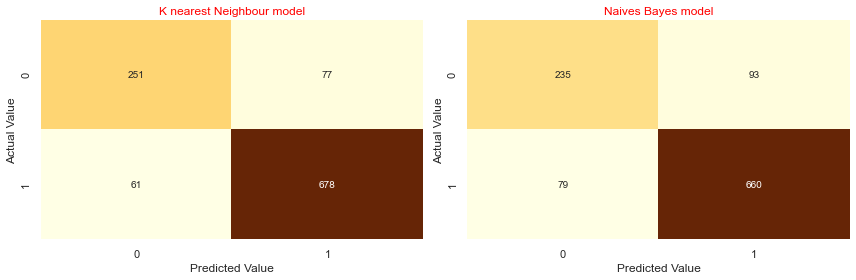

In [254]:
# Comparing the confusion matrices from GaussiansNB model and KNN models for train set 
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
fig=plt.figure(figsize=(12,4))
for i in range(0,len(models)):
    ax=fig.add_subplot(1,2,i+1)
    if models[i]==KNN_model:
        sns.heatmap(confusion_matrix(y_train_KNN,models[i].predict(X_train_KNN)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(y_train_NB,models[i].predict(X_train_NB)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
plt.tight_layout()

#    plot_confusion_matrix(modelLR,X_train,y_train)     

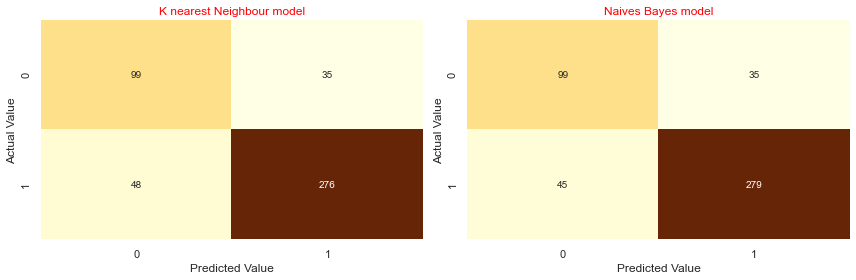

In [255]:
# Comparing the confusion matrices from gaussiansNB and KNN models for test set: 
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
fig=plt.figure(figsize=(12,4))
for i in range(0,len(models)):
    ax=fig.add_subplot(1,2,i+1)
    if models[i]==KNN_model:
        sns.heatmap(confusion_matrix(y_test_KNN,models[i].predict(X_test_KNN)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(y_test_NB,models[i].predict(X_test_NB)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
plt.tight_layout()

#    plot_confusion_matrix(modelLR,X_train,y_train)  

Area under the curve for KNN model is 0.935
Area under the curve for NB model is 0.887


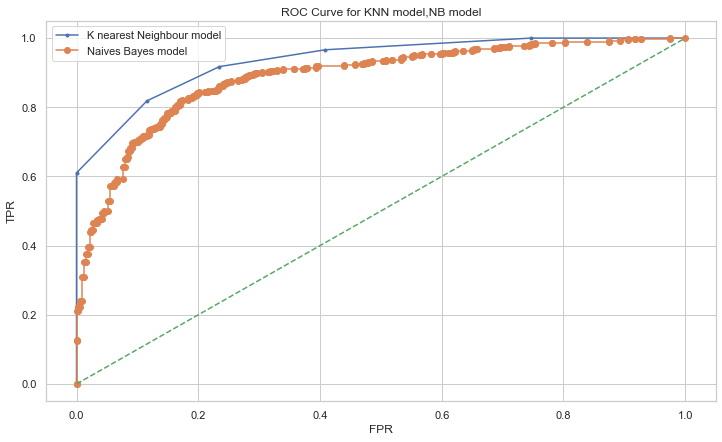

In [256]:

# Comparing area under curve for GaussiansNB and KNN models for train set:
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
print('Area under the curve for KNN model is',
      round(roc_auc_score(y_train_KNN,KNN_model.predict_proba(X_train_KNN)[:,1]),3))
print('Area under the curve for NB model is',
      round(roc_auc_score(y_train_NB,NB_model.predict_proba(X_train_NB)[:,1]),3))


plt.figure(figsize=(12,7))
fpr_dtc,tpr_dtc,thresholds=roc_curve(y_train_KNN,KNN_model.predict_proba(X_train_KNN)[:,1])
plt.plot(fpr_dtc,tpr_dtc,marker='.')
fpr_rfc,tpr_rfc,thresholds=roc_curve(y_train_NB,NB_model.predict_proba(X_train_NB)[:,1])
plt.plot(fpr_rfc,tpr_rfc,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve for {}'.format('KNN model,NB model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

Area under the curve for KNN model is 0.842
Area under the curve for NB model is 0.887


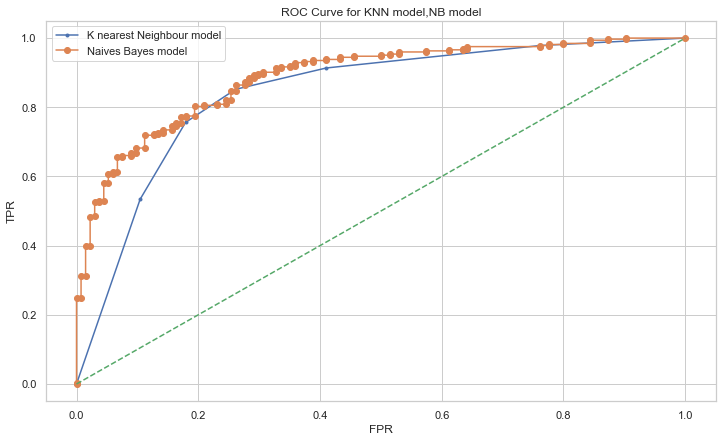

In [257]:
# Comparing area under curve for Gaussians and KNN models for test set:
models=[KNN_model,NB_model]
# models_names={modelLR:'Logistic Regression model',modelLDA:'Linear Discriminate model'}
models_names={KNN_model:'K nearest Neighbour model',NB_model:'Naives Bayes model'}
print('Area under the curve for KNN model is',
      round(roc_auc_score(y_test_KNN,KNN_model.predict_proba(X_test_KNN)[:,1]),3))
print('Area under the curve for NB model is',
      round(roc_auc_score(y_test_NB,NB_model.predict_proba(X_test_NB)[:,1]),3))


plt.figure(figsize=(12,7))
fpr_dtc,tpr_dtc,thresholds=roc_curve(y_test_KNN,KNN_model.predict_proba(X_test_KNN)[:,1])
plt.plot(fpr_dtc,tpr_dtc,marker='.')
fpr_rfc,tpr_rfc,thresholds=roc_curve(y_test_NB,NB_model.predict_proba(X_test_NB)[:,1])
plt.plot(fpr_rfc,tpr_rfc,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve for {}'.format('KNN model,NB model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

In [258]:
 # Tabular comparasion of Accuracy ,AUC,Recall,Precesion,and F1-Score of guassians NB & KNN model (Test & Train data):

index=['Accuracy','AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN train':[KNN_model_score_train,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_model_score_test,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
       'NB Train':[model_score_NB_Train,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[model_score_NB_Test,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1]},index=index)
round(data,2)


,KNN train,KNN Test,NB Train,NB Test
Accuracy,0.87,0.82,0.84,0.83
AUC,0.94,0.84,0.89,0.89
Recall,0.92,0.85,0.89,0.86
Precision,0.90,0.89,0.88,0.89
F1 Score,0.91,0.87,0.88,0.87


1.6) Model Tuning (2 pts) , Bagging ( 2.5 pts) and Boosting (2.5 pts).
	7

# Model Tuning 
Model Tuning
What is Model Tuning?

Tuning is usually a trial-and-error process by which you change some hyperparameters (for example, the number of trees in a tree-based algorithm or the value of alpha in a linear algorithm), run the algorithm on the data again, then compare its performance on your validation set in order to determine which set of hyperparameters results in the most accurate model.

All machine learning algorithms have a “default” set of hyperparameters, which Machine Learning Mastery defines as “a configuration that is external to the model and whose value cannot be estimated from data.” Different algorithms consist of different hyperparameters. For example, regularized regression models have coefficients penalties, decision trees have a set number of branches, and neural networks have a set number of layers. When building models, analysts and data scientists choose the default configuration of these hyperparameters after running the model on several datasets.

While the generic set of hyperparameters for each algorithm provides a starting point for analysis and will generally result in a well-performing model, it may not have the optimal configurations for your particular dataset and business problem. In order to find the best hyperparameters for your data, you need to tune them.
Why is Model Tuning Important?

Model tuning allows you to customize your models so they generate the most accurate outcomes and give you highly valuable insights into your data, enabling you to make the most effective business decisions.

Random Forest

In [259]:
# Ensemble RandomForest Classifier

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
df = pd.read_excel('Election_Data(1).xlsx', sheet_name = 'Election_Dataset_Two Classes')
df.head()
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [262]:
#Label Encoding has been done and all object columns are converted to number.
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [263]:
# Arrange data into independent variables and dependent variables
# # Create a separate dataframe consisting only of the features i.e independent
X =  df.drop("vote",axis=1) ## Features
y = df["vote"]  ## Target

In [264]:
X_train_RF,X_test_RF,y_train_RF,y_test_RF=train_test_split(X,y,test_size=.30,random_state=0)

In [265]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train_RF,y_train_RF)

RandomForestClassifier(random_state=1)

In [266]:
## Performance Matrix on test data set
y_train_predict_RF= RF_model.predict(X_train_RF)
RF_model_score= RF_model.score(X_train_RF,y_train_RF)
print(RF_model_score)
print(metrics.confusion_matrix(y_train_RF, y_train_predict_RF))
print(metrics.classification_report(y_train_RF, y_train_predict_RF))

1.0
[[328   0]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [267]:
## Performance Matrix on test data set
y_test_predict_RF= RF_model.predict(X_test_RF)
RF_model_score= RF_model.score(X_test_RF,y_test_RF)
print(RF_model_score)
print(metrics.confusion_matrix(y_test_RF, y_test_predict_RF))
print(metrics.classification_report(y_test_RF, y_test_predict_RF))

0.8165938864628821
[[ 94  40]
 [ 44 280]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       134
           1       0.88      0.86      0.87       324

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Grid Search for finding out the optimal values for the hyper parameters.Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher execution time, so the best values that came after the search are directly put in Param_grid.

In [268]:
param_grid = {'max_depth': [5,6,7],
    'max_features': [8,9,10],
    'min_samples_leaf': [20,25,30],
    'min_samples_split': [50,60,70],
    'n_estimators': [50,100,150]
}
    

rfcl = RandomForestClassifier(random_state=1)
# Applying Grid Search
# grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = grid_rf,n_jobs=-1, cv = 3,scoring='f1')
grid_search_RF=GridSearchCV(estimator = rfcl, param_grid = param_grid,cv = 5)

In [269]:
# Fitting the model with Train and Test data - Without scaling
# grid_search_Rf.fit(X_train_RF, y_train_RF)

In [270]:
grid_search_RF.fit(X_train_RF,y_train_RF)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [8, 9, 10],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [50, 100, 150]})

In [271]:
grid_search_RF.best_params_

{'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'n_estimators': 50}

In [272]:
best_grid_RF = grid_search_RF.best_estimator_

In [273]:
best_grid_RF

RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=20,
                       min_samples_split=50, n_estimators=50, random_state=1)

In [274]:

model_RF=RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=20,
                       min_samples_split=50, n_estimators=200)

In [275]:
ytrain_predict_RF = best_grid_RF.predict(X_train_RF)
ytest_predict_RF = best_grid_RF.predict(X_test_RF)

In [276]:
# RF Model Performance Evaluation on Training data
confusion_matrix(y_train_RF,ytrain_predict_RF)

array([[239,  89],
       [ 75, 664]], dtype=int64)

In [277]:
# RF Model Performance Evaluation on Test data
confusion_matrix(y_test_RF,ytest_predict_RF)

array([[ 96,  38],
       [ 41, 283]], dtype=int64)

In [278]:
RF_train_acc=best_grid_RF.score(X_train_RF,y_train_RF) 
RF_train_acc

0.8462980318650422

In [279]:
RF_test_acc=best_grid_RF.score(X_test_RF,y_test_RF) 
RF_test_acc

0.8275109170305677

In [280]:
print(classification_report(y_train_RF,ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       328
           1       0.88      0.90      0.89       739

    accuracy                           0.85      1067
   macro avg       0.82      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [281]:
print(classification_report(y_test_RF,ytest_predict_RF))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       134
           1       0.88      0.87      0.88       324

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [282]:
RF_metrics=classification_report(y_train_RF,ytrain_predict_RF,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
train_RF_precision=round(df.loc["1"][0],2)
train_RF_recall=round(df.loc["1"][1],2)
train_RF_f1=round(df.loc["1"][2],2)
print ('train_RF_precision ',train_RF_precision)
print ('train_RF_recall ',train_RF_recall)
print ('train_RF_f1 ',train_RF_f1)

train_RF_precision  0.88
train_RF_recall  0.9
train_RF_f1  0.89


In [283]:
RF_metrics=classification_report(y_test_RF,ytest_predict_RF,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
test_RF_precision=round(df.loc["1"][0],2)
test_RF_recall=round(df.loc["1"][1],2)
test_RF_f1=round(df.loc["1"][2],2)
print ('test_RF_precision ',test_RF_precision)
print ('test_RF_recall ',test_RF_recall)
print ('test_RF_f1 ',test_RF_f1)

test_RF_precision  0.88
test_RF_recall  0.87
test_RF_f1  0.88


Area under Curve is 0.9118246476781411


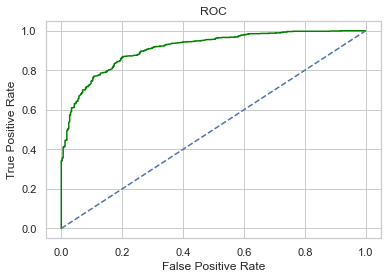

In [284]:
train_RF_fpr, train_RF_tpr,_=roc_curve(y_train_RF,best_grid_RF.predict_proba(X_train_RF)[:,1])
plt.plot(train_RF_fpr,train_RF_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
train_RF_auc=roc_auc_score(y_train_RF,best_grid_RF.predict_proba(X_train_RF)[:,1])
print('Area under Curve is', train_RF_auc)

Area under Curve is 0.886861986364474


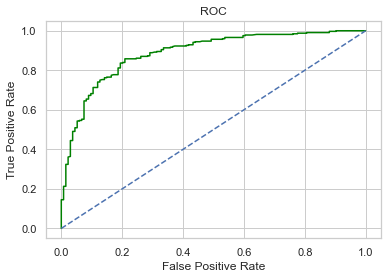

In [285]:
test_RF_fpr, test_RF_tpr,_=roc_curve(y_test_RF,best_grid_RF.predict_proba(X_test_RF)[:,1])
plt.plot(test_RF_fpr,test_RF_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
test_RF_auc=roc_auc_score(y_test_RF,best_grid_RF.predict_proba(X_test_RF)[:,1])
print('Area under Curve is', test_RF_auc)

In [286]:
# Variable Importance
print (pd.DataFrame(best_grid_RF.feature_importances_, columns = ["Imp"], index = X_train_RF.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.407464
Blair                    0.223090
Europe                   0.186150
political.knowledge      0.113613
age                      0.033714
economic.cond.national   0.029349
economic.cond.household  0.006124
gender                   0.000494


As per the model tuning on random forest model we come to see that Hague variable is the most important variable followed by the Blair ,Europe and political .knowledge.

In [287]:
# Ensemble Learning - Bagging

In [288]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=model_RF, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train_RF, y_train_RF)


0.8406113537117904


<AxesSubplot:>

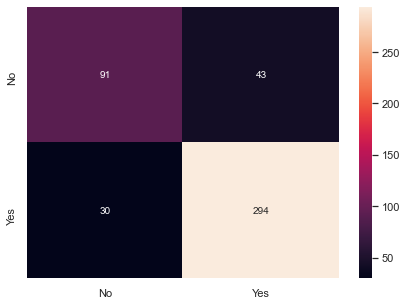

In [289]:
y_predict = bgcl.predict(X_test_RF)

print(bgcl.score(X_test_RF , y_test_RF))

cm=metrics.confusion_matrix(y_test_RF, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8350515463917526


<AxesSubplot:>

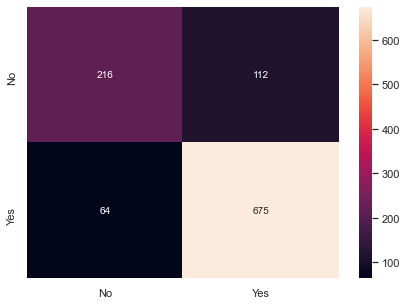

In [290]:
y_predict = bgcl.predict(X_train_RF)

print(bgcl.score(X_train_RF , y_train_RF))

cm=metrics.confusion_matrix(y_train_RF, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [291]:
# Ensemble Learning - AdaBoosting

In [292]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train_RF, y_train_RF)

0.8231441048034934


<AxesSubplot:>

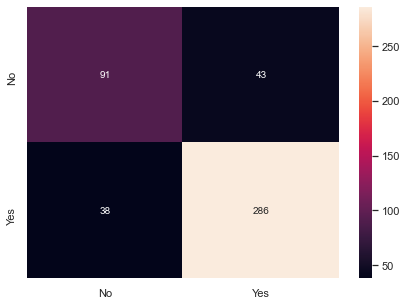

In [293]:
y_predict = abcl.predict(X_test_RF)
print(abcl.score(X_test_RF , y_test_RF))

cm=metrics.confusion_matrix(y_test_RF, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


0.8537956888472352


<AxesSubplot:>

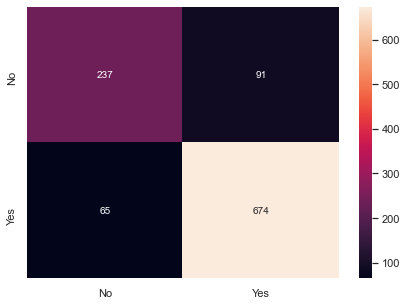

In [294]:
y_predict = abcl.predict(X_train_RF)
print(abcl.score(X_train_RF , y_train_RF))

cm=metrics.confusion_matrix(y_train_RF, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [295]:
# Ensemble Learning - GradientBoost

In [296]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train_RF, y_train_RF)

0.8296943231441049


<AxesSubplot:>

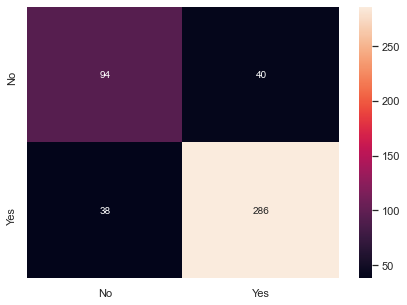

In [297]:
y_predict = gbcl.predict(X_test_RF)
print(gbcl.score(X_test_RF, y_test_RF))
cm=metrics.confusion_matrix(y_test_RF, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8687910028116214


<AxesSubplot:>

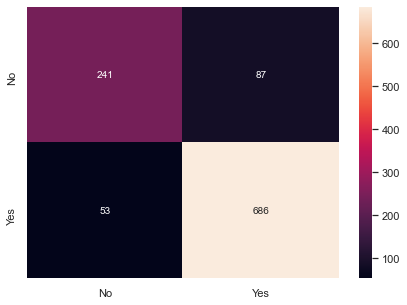

In [298]:
y_predict = gbcl.predict(X_train_RF)
print(gbcl.score(X_train_RF, y_train_RF))
cm=metrics.confusion_matrix(y_train_RF, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [299]:
# Ensemble RandomForest Classifier

In [300]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=50,random_state=1)
RF_model.fit(X_train_RF,y_train_RF)

RandomForestClassifier(n_estimators=50, random_state=1)

0.8187772925764192


<AxesSubplot:>

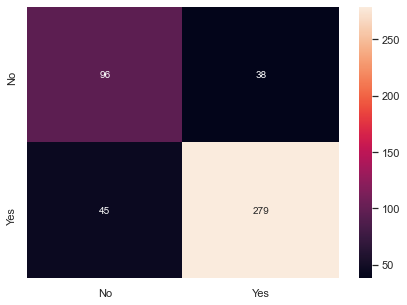

In [301]:
y_predict = RF_model.predict(X_test_RF)
print(RF_model.score(X_test_RF, y_test_RF))
cm=metrics.confusion_matrix(y_test_RF, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

1.0


<AxesSubplot:>

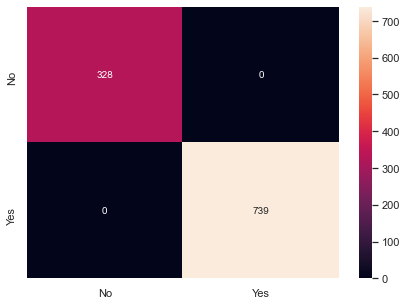

In [302]:
y_predict = RF_model.predict(X_train_RF)
print(RF_model.score(X_train_RF, y_train_RF))
cm=metrics.confusion_matrix(y_train_RF, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (4 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)
	7

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.
	5

Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

    President Franklin D. Roosevelt in 1941
    President John F. Kennedy in 1961
    President Richard Nixon in 1973

    Find the number of characters, words and sentences for the mentioned documents. – 3 Marks

(Hint: use .words(), .raw(), .sent() for extracting counts)

    Remove all the stopwords from all the three speeches. – 3 Marks
    Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks
    Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]




Code Snippet to extract the three speeches:

In [303]:
#importing libraries and the data
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
nltk.download('punkt')
inaugural.fileids()
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
import numpy as np
import pandas as pd
import nltk
import random
import string

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\smita\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\smita\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [304]:
!pip install wordcloud

In [305]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts) 3

In [306]:
# To see the speech of leaders with the year can be seen using .raw()
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [307]:
print(inaugural.words('1941-Roosevelt.txt'))
print(inaugural.words ('1961-Kennedy.txt'))
print(inaugural.words ('1973-Nixon.txt'))

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]
['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]
['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]


In [308]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [309]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [310]:
#creating a variable for each of the specific speeches to do the analysis
df_Roosevelt= inaugural.raw('1941-Roosevelt.txt')
df_Kennedy = inaugural.raw('1961-Kennedy.txt')
df_Nixon = inaugural.raw('1973-Nixon.txt')

In [311]:
print(len(inaugural.raw('1941-Roosevelt.txt')))

7571


The number of character in '1941 Roosevelt.txt'of Inaugural is 7571.

In [312]:
print(len(inaugural.raw('1961-Kennedy.txt')))

7618


The number of character in "1961 Kennedy.txt' of Inaugural is 7618.

In [313]:
print(len(inaugural.raw('1973-Nixon.txt')))

9991


The number of character in '1961 Kennedy.txt'of Inaugural is 9991.

In [314]:
print(len(inaugural.words('1941-Roosevelt.txt')))

1536


The number of words in '1941-Roosevelt.txt' are 1536.

In [315]:
print(len(inaugural.words('1961-Kennedy.txt')))

1546


The number of words in '1961-Kennedy.txt' are 1546

In [316]:
print(len(inaugural.words('1973-Nixon.txt')))

2028


The number of words in '1973-Nixon.txt' are 2028.

In [317]:
print(len(inaugural.sents('1941-Roosevelt.txt')))

68


The number of sentences in '1941-Roosevelt' are 68.

In [318]:
print(len(inaugural.sents('1961-Kennedy.txt')))

52


The number of sentences in '1961-Kennedy.txt' are 52.

In [319]:
print(len(inaugural.sents('1973-Nixon.txt')))

69


The number of sentences in '1973-Nixon.txt' are 69.

2.2) Remove all the stopwords from the three speeches. 3

In [320]:
import random
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create a object named PS for the PorterStemmer

In [321]:

PS = PorterStemmer()

In [322]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) #,"us"])

Removing the stopword on '1941-Roosevelt's.txt' speech:

In [323]:
Roosevelt_lower = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
Roosevelt_clean = [word for word in Roosevelt_lower if word not in stopwords]
Roosevelt_clean_stem = [PS.stem(word) for word in Roosevelt_clean]
Roosevelt_freq = nltk.FreqDist(Roosevelt_clean_stem)

Removing the stopword on '1961-Kennedy's.txt'speech:

In [324]:
Kennedy_lower = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
Kennedy_clean = [word for word in Kennedy_lower if word not in stopwords]
Kennedy_clean_stem = [PS.stem(word) for word in Kennedy_clean]
Kennedy_freq = nltk.FreqDist(Kennedy_clean_stem)

Removing the stopword on'1973-Nixon's.txt'speech:

In [325]:

Nixon_lower = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
Nixon_clean = [word for word in Nixon_lower if word not in stopwords]
Nixon_clean_stem = [PS.stem(word) for word in Nixon_clean]
Nixon_freq = nltk.FreqDist(Nixon_clean_stem)

In [326]:
df_stopwords = pd.DataFrame(stopwords)
df_stopwords.head(5)

,0
0,i
1,me
2,my
3,myself
4,we


2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 3

In [327]:
print("The top three words in Roosevelt's Speech are :\n",Roosevelt_freq.most_common(3))

The top three words in Roosevelt's Speech are :
 [('nation', 17), ('know', 10), ('peopl', 9)]


In [328]:
print("The top three words in Kennedy's Speech are :\n",Kennedy_freq.most_common(3))

The top three words in Kennedy's Speech are :
 [('let', 16), ('us', 12), ('power', 9)]


In [329]:
print("The top three words in Nixon's Speech are :\n",Nixon_freq.most_common(3))

The top three words in Nixon's Speech are :
 [('us', 26), ('let', 22), ('america', 21)]


2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords) 3

In [330]:
df_roosevelt = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})
df_kennedy =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})
df_nixon =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})

In [331]:
from wordcloud import WordCloud
words_roosevelt = ' '.join(df_roosevelt['Roosevelt'])
cleaned_word_roosevelt = " ".join([word for word in words_roosevelt.split()
                            if word not in stopwords
                            ])
cleaned_word_roosevelt


'On national day inauguration since 1789, people renewed sense dedication United States. In Washington\'s day task people create weld together nation. In Lincoln\'s day task people preserve Nation disruption within. In day task people save Nation institutions disruption without. To us come time, midst swift happenings, pause moment take stock recall place history been, rediscover may be. If not, risk real peril inaction. Lives nations determined count years, lifetime human spirit. The life man three-score years ten: little more, little less. The life nation fullness measure live. There men doubt this. There men believe democracy, form Government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future freedom ebbing tide. But Americans know true. Eight years ago, life Republic seemed frozen fatalistic terror, proved true. We midst shock acted. We acted quickly, boldly, decisively. These later years living years frui

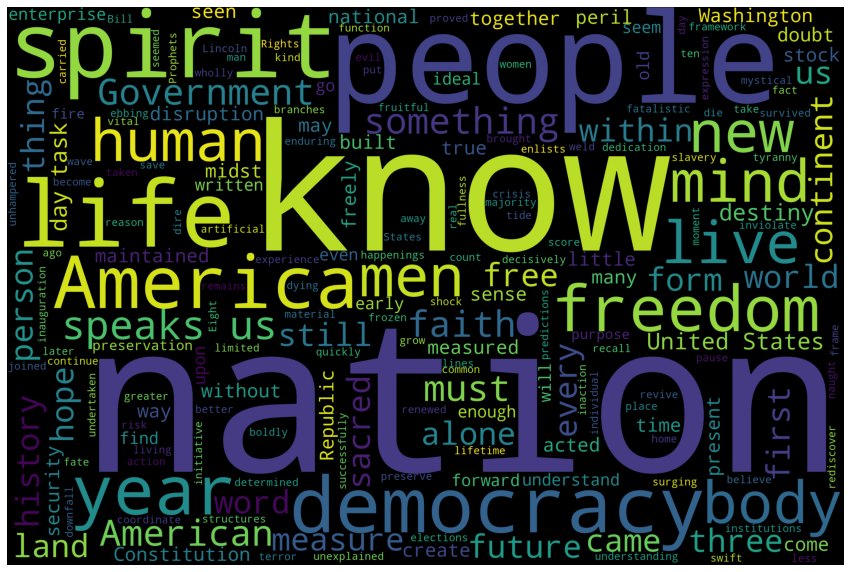

In [332]:
from wordcloud import WordCloud
words_roosevelt = ' '.join(df_roosevelt['Roosevelt'])
cleaned_word_roosevelt = " ".join([word for word in words_roosevelt.split()
                            if word not in stopwords
                            ])
wordcloud_roosevelt = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_roosevelt)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_roosevelt)
plt.axis('off')
plt.show()

In [333]:


from wordcloud import WordCloud
words_kennedy = ' '.join(df_kennedy['Kennedy'])
cleaned_word_kennedy = " ".join([word for word in words_kennedy.split()
                            if word not in stopwords
                            ])
cleaned_word_kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, observe today victory party, celebration freedom symbolizing end, well beginning signifying renewal, well change. For I sworn I Almighty God solemn oath forebears l prescribed nearly century three quarters ago. The world different now. For man holds mortal hands power abolish forms human poverty forms human life. And yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state, hand God. We dare forget today heirs first revolution. Let word go forth time place, friend foe alike, torch passed new generation Americans born century, tempered war, disciplined hard bitter peace, proud ancient heritage unwilling witness permit slow undoing human rights Nation always committed, committed today home around world. Let every nation know, whether wishes us well ill, shall pay price, bear burden, meet

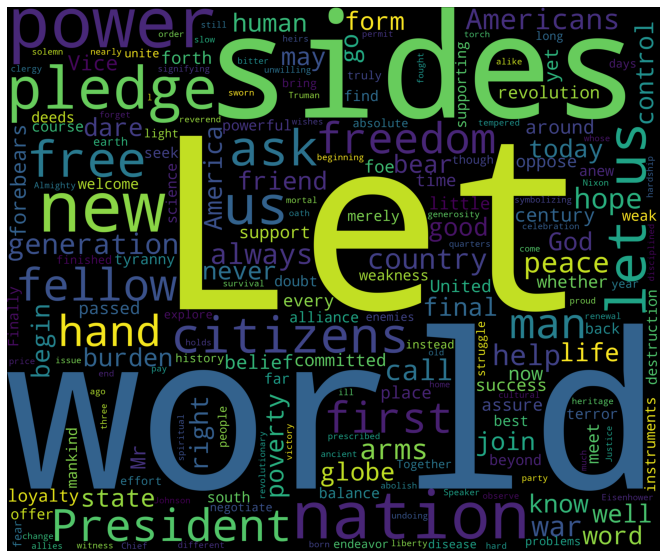

In [334]:


from wordcloud import WordCloud
words_kennedy = ' '.join(df_kennedy['Kennedy'])
cleaned_word_kennedy = " ".join([word for word in words_kennedy.split()
                            if word not in stopwords
                            ])
wordcloud_kennedy = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_kennedy)
plt.figure(1,figsize=(12,10))
plt.imshow(wordcloud_kennedy)
plt.axis('off')
plt.show()



In [335]:
from wordcloud import WordCloud
words_nixon = ' '.join(df_nixon['Nixon'])
cleaned_word_nixon = " ".join([word for word in words_nixon.split()
                            if word not in stopwords
                            ])
cleaned_word_nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, fellow citizens great good country share together: When met four years ago, America bleak spirit, depressed prospect seemingly endless war abroad destructive conflict home. As meet today, stand threshold new era peace world. The central question us is: How shall use peace? Let us resolve era enter postwar periods often been: time retreat isolation leads stagnation home invites new danger abroad. Let us resolve become: time great responsibilities greatly borne, renew spirit promise America enter third century nation. This past year saw far-reaching results new policies peace. By continuing revitalize traditional friendships, missions Peking Moscow, able establish base new durable pattern relationships among nations world. Because America\'s bold initiatives, 1972 long remembered year greatest progress since end World War II toward lasting peace world. The peace seek world flimsy peace merely interlude wa

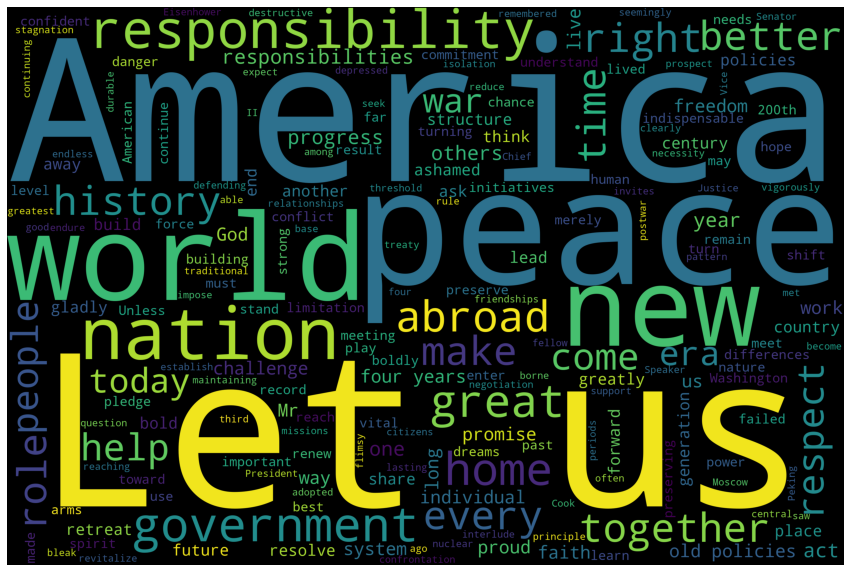

In [336]:
from wordcloud import WordCloud
words_nixon = ' '.join(df_nixon['Nixon'])
cleaned_word_nixon = " ".join([word for word in words_nixon.split()
                            if word not in stopwords
                            ])
wordcloud_nixon = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_nixon)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_nixon)
plt.axis('off')
plt.show()